<a href="https://colab.research.google.com/github/Asfak21/Capstone-2_Retail_Sales_Predection/blob/main/Asfak_IndividualColab_RetailSalesPrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction



**Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name-**    - Asfakullah Layek


# **Project Summary -**

Rossman Sales Prediction data is a data set that contain historical sales data for a retail store chain. The data includes information about the store, such as Competitior’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day.

After understanding the data and getting variables, we first gathered and clean the data, and handled the null values and finally for getting better results we merged two datasets on inner join after that we have also typecasted the needed features into required format in order to visualize them properly. We performed indepth EDA plotted different types of graphs by separating them into univariate, bivariate and multivariate categories and we gathered many good insights from it that helped us to make future decisions of ML model pipeline. Then further on, using feature engineering and data preprocessing we have extracted features like PromoDuration and CompetitionDuration that helped us to get rid of some 4 features that are not directly impacting our Sales.

Now as we are ready with our final features but still there were two problems with us. First is we don't have normally distributed data with us which is very essential as having normally distributed data is the one of the assuptions of linear model such as Linear Regression. And the other is we don't have the data on the same scale i.e values are lying far apart from each other. In order to get normally distributed data we have applied various transformation techniques such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and others as well and plotted the quantie-quantile plot for visualizing how far our data points are from the normal distributions. For our second challenge i.e data on same scale we have used the sklearn library StandardScaler to scale the data.

At last we splited the dataset into training and testing sets. Next, we choose various linear and non linear supervised machine learning algorithms and use the training data to train the model. Finally, we evaluated the model's performance on the testing data to see how well it is able to predict the sales for the real time data. For this task we used many machine learning algorithms, including linear regression, decision trees, random forests. We got the similar results as Random Forest (~96.96%) but we got the results faster as it uses all the cores and decreases the processing time. 

# **GitHub Link -**

https://github.com/Asfak21/Capstone-2_Retail_Sales_Predection

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Data Description**
**Rossmann Stores Data.csv - historical data including Sales**
**store.csv - supplemental information about the stores**

**Data fields**

**Most of the fields are self-explanatory. The following are descriptions for those that aren't.**

*   Id - an Id that represents a (Store, Date) duple within the test set
*   Store - a unique Id for each store
*   Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
*Open - an indicator for whether the store was open: 0 = closed, 1 = open
*StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*StoreType - differentiates between 4 different store models: a, b, c, d
*Assortment - describes an assortment level: a = basic, b = extra, c = extended
*CompetitionDistance - distance in meters to the nearest competitor store
*CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*Promo - indicates whether a store is running a promo on that day
*Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

# **Import Libraries**

In [1]:
# Import Libraries

# Modules for dataframe , ndarrays and math
import numpy as np
import pandas as pd
from datetime import datetime
import math

# For Data visualizations package
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Importing Library for Modeling
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
lin= LinearRegression()
import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **CSV file location & reading CSV file**

In [3]:
# Read CSV file
df_sales = pd.read_csv('/content/drive/My Drive/Alma Better/Capstone Project/Retail Sales Prediction/Copy of Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/My Drive/Alma Better/Capstone Project/Retail Sales Prediction/Copy of store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# Dataset First Look of rossmann dataset
df_sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
# Dataset First Look of store dataset
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

# **Data Exploration**

In [ ]:
# Dataset Rows & Columns count
# Checking the shape of sales dataset

df_sales.shape

(1017209, 9)

In [ ]:
# Checking the shape of store dataset
df_store.shape

(1115, 10)

**Dataset Information**

In [ ]:
# Dataset Info
# Checking the info of sales dataset
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_sales.duplicated().sum()
df_store.duplicated().sum()

0

We can see do not have any duplicated rows in both the dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

#checking for null values and the data types of all the columns in sales dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Missing Values/Null Values Count

df_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

We can see there are no Null Values in the sales dataset

In [ ]:
#checking for null values and the data types of all the columns in stores dataset.
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Missing Values/Null Values Count
# Now counting the number of null values in each column in store dataset
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Observation**

we can see there are four columns which contains null values this are following:

**CompetitionDistance**- This is the distance from the nearest competitor store. We will check the distribution of the data according to which we will determine which among mean, median or mode will be suitable to replace the null value with.

**CompetitionOpenSinceMonth**- gives the around which the nearest competitor was opened, mode of the column would tell us the most occuring month

**CompetitionOpenSinceYear**- gives the year around which the nearest competitor was opened, mode of the column would tell us the most occuring month

**Promo2SinceWeek, Promo2SinceYear and PromoInterval** -are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

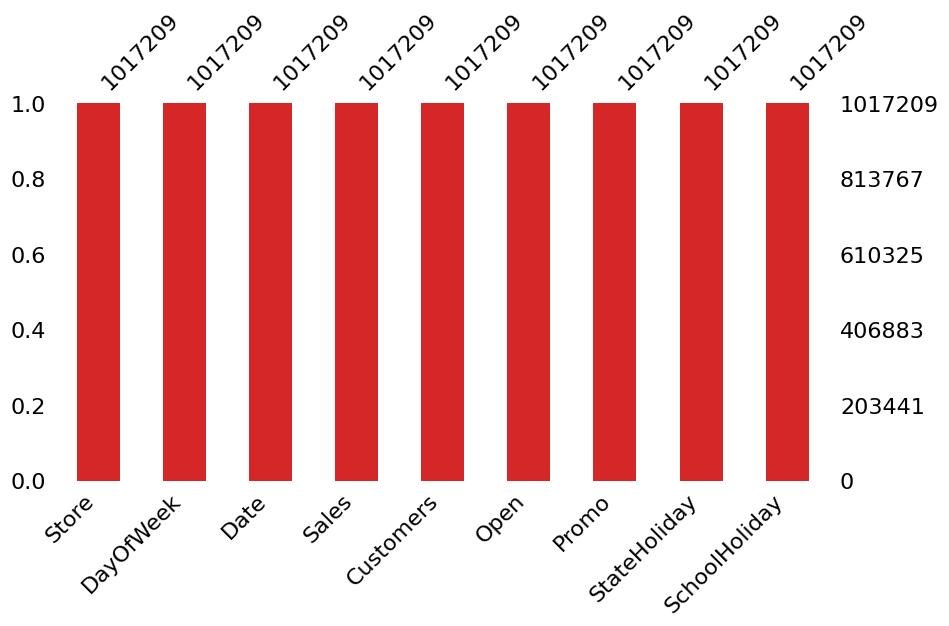

In [ ]:

# Visualizing the missing values of sales dataset
msno.bar(df_sales,figsize=(10,5), color="tab:red")

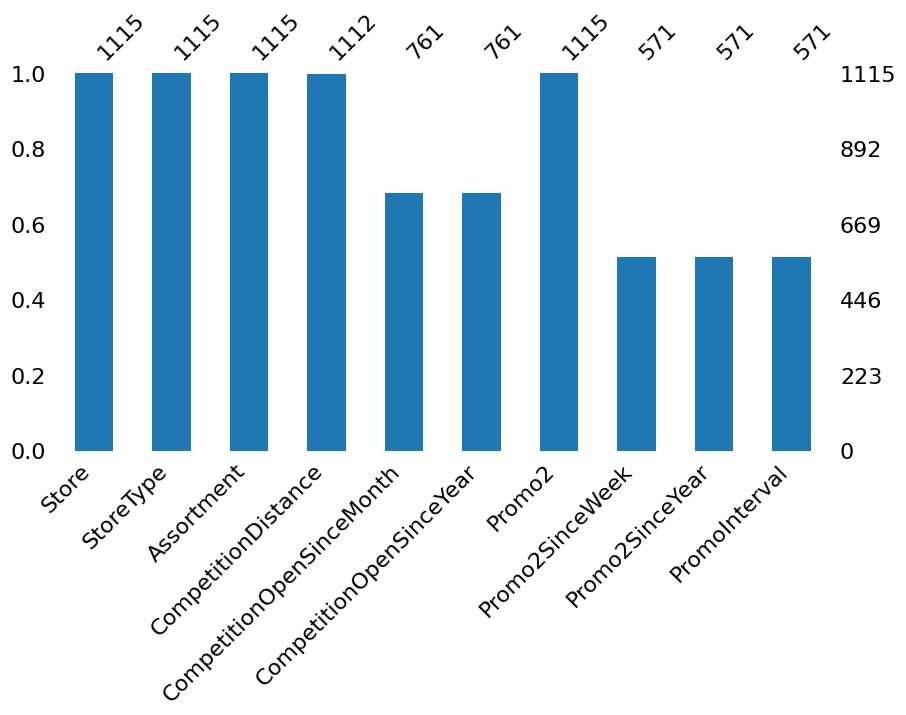

In [ ]:
# Visualizing the missing values of stores dataset
msno.bar(df_store,figsize=(10,5), color="tab:blue")

### What did you know about your dataset?

We have seeen below statements from our dataset

1.**'Sales dataset'** is having **1017209 rows** and **9 columns** and does not have any null value.

2.**'Stores dataset'** is having **1115 rows and 10 columns.** It contains null values in total six features viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval.

3.There are **no duplicate values present in both the datasets**.

4.There are total **4 categorical feature**s in 'sales' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
#Column names of Sales dataset
df_sales.columns.tolist()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [ ]:
#Column names of Store dataset
df_store.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
#Sales Dataset Describe
df_sales.describe(include='all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

In [ ]:
#Stores Dataset Describe
df_store.describe(include='all')

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

### Variables Description 

**Rossmann Stores Data.csv** - historical data including Sales

**store.csv** - supplemental information about the stores

**Data fields**

**Most of the fields are self-explanatory. The following are descriptions for those that aren't.**

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week**] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_sales.columns.tolist():
  print("The Unique Values of', i, 'are:", df_sales[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: [5 4 3 2 1 7 6]
The Unique Values of', i, 'are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-0

In [ ]:
# Check Unique Values for each variable.
for i in df_store.columns.tolist():
  print("The Unique Values of', i, 'are:", df_store[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: ['c' 'a' 'd' 'b']
The Unique Values of', i, 'are: ['a' 'c' 'b']
The Unique Values of', i, 'are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.

## 3. ***Data Wrangling***

## **Treting the null value**

a). Handling null values from **CompetitionDistance** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionDistance feature

df_store[df_store["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

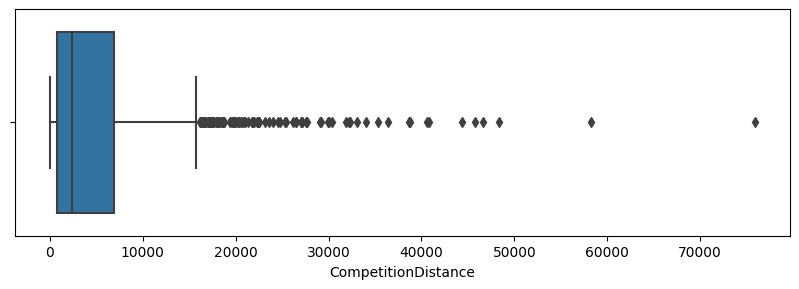

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(10,3))
sns.boxplot(x= df_store["CompetitionDistance"])

In order to fill the null values of CompetitionDistance we have 4 options:

1. Zero(0) - Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.

2. Mean - Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.

3. Median - To get good results replacing with median can be a better choice.

4. Mode - Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

In [ ]:
# filling null values
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].median(), inplace=True)

In [ ]:
# rechecking if we have any further null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [ ]:
# rechecking if we have any null values
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


So, we do not have any further null values in **CompetitionDistance** feature.:

**b)**. Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
df_store[df_store["CompetitionOpenSinceMonth"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

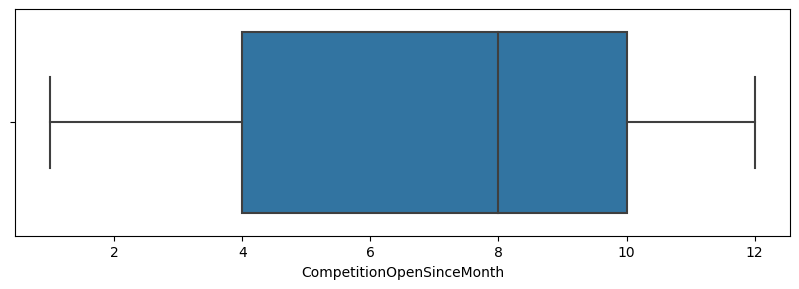

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(10,3))
sns.boxplot(df_store["CompetitionOpenSinceMonth"])

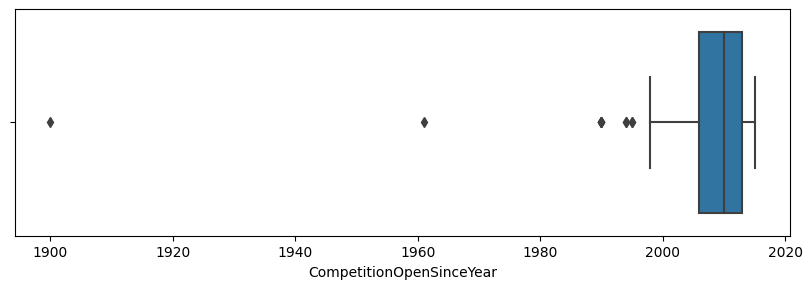

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(10,3))
sns.boxplot(df_store["CompetitionOpenSinceYear"])

Filling null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with Mode.

In [ ]:
# filling null values of CompetitionOpenSinceMonth
df_store["CompetitionOpenSinceMonth"].fillna(df_store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [ ]:

# filling null values of CompetitionOpenSinceYear
df_store["CompetitionOpenSinceYear"].fillna(df_store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [ ]:

# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval feature.**

Since corresponding value where Promo2 is 0 for features Promo2SinceWeek, Promo2SinceYear and PromoInterval having null values. So, we are replacing null values with 0.

In [ ]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
df_store["Promo2SinceWeek"].fillna(0, inplace=True)
df_store["Promo2SinceYear"].fillna(0, inplace=True)
df_store["PromoInterval"].fillna(0, inplace=True)

In [ ]:
# rechecking if our features contains more null values
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


So, we have reached our first milestone by cleaning up all the null/missing values from both the datasets.

**2. Merging datasets**

In [ ]:
# checking shape of dataset using left join
df_left= pd.merge(df_sales, df_store, on="Store", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df_left.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(df_sales, df_store, on="Store", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


# checking shape of dataset using inner join
df_inner= pd.merge(df_sales, df_store, on="Store", how= "inner")
print(df_inner.shape)
print(f"Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}")

# checking shape of dataset using outer join
df_outer= pd.merge(df_sales, df_store, on="Store", how= "outer")
print(df_outer.shape)
print(f"Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}")

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0


Since, we are obtaining the same shape and 0 null values from all the joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

In [ ]:
#using inner join for our further analysis
df= pd.merge(df_sales, df_store, on="Store", how= "inner")
print(df.shape)

(1017209, 18)


In [ ]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

3. **Typecasting**

In [ ]:
# Checking dtypes of all the variables of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [ ]:
# Verifying the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

**### What all manipulations have you done and insights you found?**


In data wrangling we have divided it into three sections:

1. **Null values treatment:** In this section we have treated all the null values from both the datasets. We did the following replacements:

a. Replaced null values of CompetitionDistance with MEDIAN.

b. Replaced null values of CompetitionOpenSinceMonth and with MODE.

c. Replaced null values of CompetitionOpenSinceYear and with MODE.

d. Replaced null values of Promo2SinceWeek and with 0.

e. Replaced null values of Promo2SinceYear and with 0.

f. Replaced null values of PromoInterval and with 0.

2. **Merging datasets:** We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.

3. **Typecasting:** In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:

a. Typecasted the Date feature to Datetime format.

b. Typecasted the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear feature to Integer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule:

 Univariate Analysis

 Bivariate Analysis

 Multivariate Analysis

Lets do **Univariate Analysis**


#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# Plotting distribution plot for each continuous variables : Sales, Competition Distance and Customers

Text(0.5, 1.0, 'Density distribution of Customers')

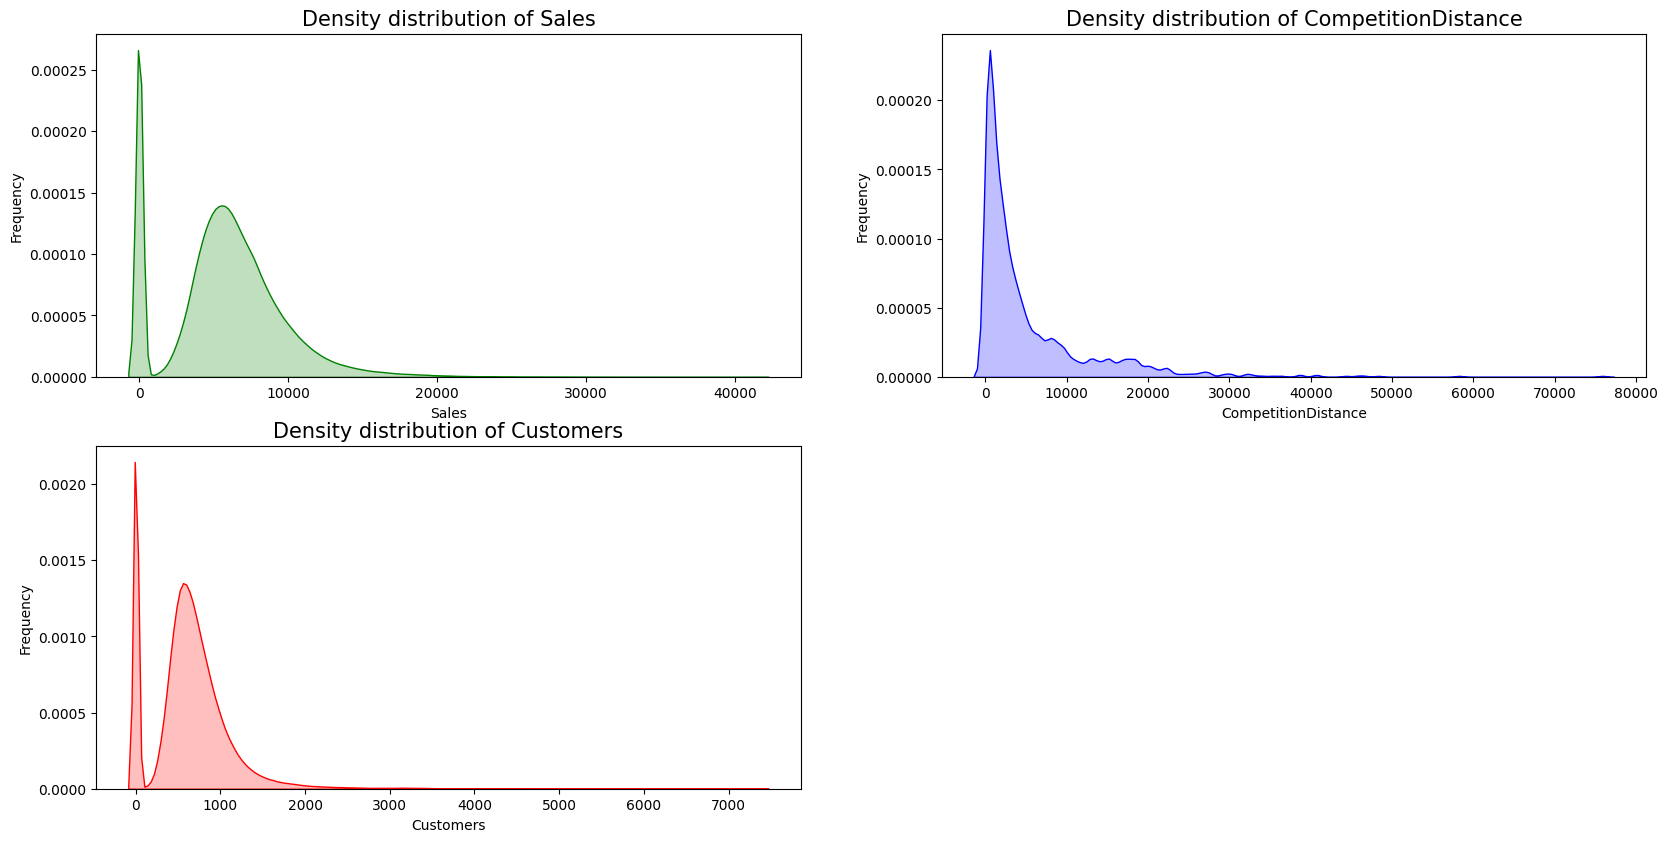

In [ ]:
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Green", shade = True)
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True)
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Red", shade = True)
plt.title('Density distribution of Customers',size = 15)


##### **1. Why did you pick the specific chart?**

We picked this chart as it shows whether the observations are high or low and also whether they are concentrated in one area or spread out across the entire scale.

##### **2. What is/are the insight(s) found from the chart?**



1.   Avarage Sales value is approx 1000 and grapg is rightly skewed.

2.  We can clearly observe that most of the stores have their competition within 5Km range which indicates mostly competiting stores are located nearby to each other.

3.  Avarage number of customer visiting stores is 1000.






**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

We plotted frequency distribution graph for sales, customer and competition distance with the help of which we came to know that many competiting stores are densly located. so, business should plan different strategies to sustain in the competitive market.

#### Chart - 2

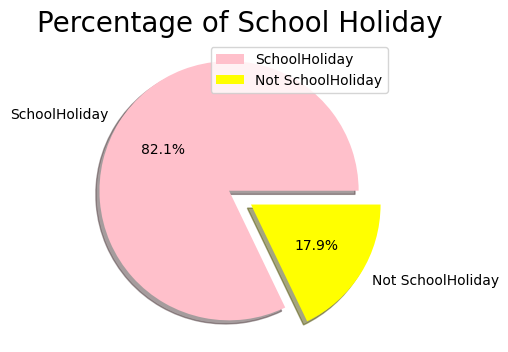

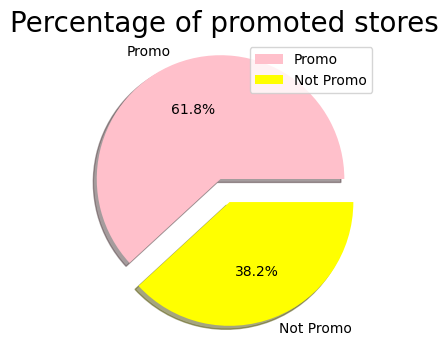

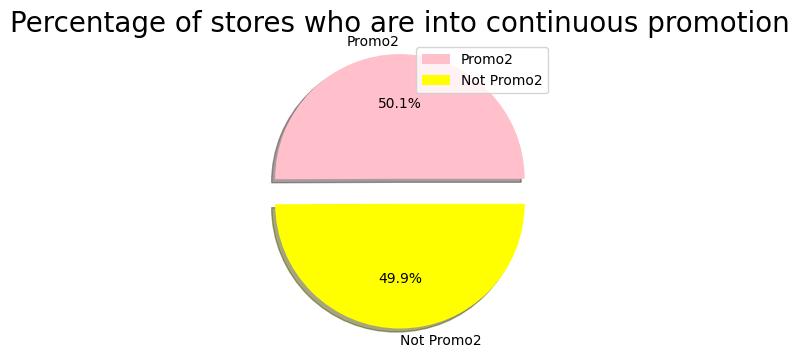

In [ ]:
# Chart - 2 visualization code
#Lets check distribution for Some discrete features(SchoolHoliday,Promo,Promo2):
labels = 'SchoolHoliday' , 'Not SchoolHoliday'
sizes = df.SchoolHoliday.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of School Holiday",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo' , 'Not Promo'
sizes = df.Promo.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of promoted stores",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo2' , 'Not Promo2'
sizes = df.Promo2.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of stores who are into continuous promotion",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()
     

 **1. Why did you pick the specific chart?**

We have choose the pie chart as it represents the contribution of each part of the data to a whole where the arc size of each slice is directly proportional to the contribution of that part.

**2. What is/are the insight(s) found from the chart?**


1. From first pie chart We can say that market will observe approx 20% of school Holidays.
2. We see that 44.6% of stores are into promotions and 55.4% of stores are not into promotions .The reason that more stores are not into promotions may be they don't have the enough budget or they may not see enough need for promotions.

3. From Third chart we can infer that there is almost equal percentage of stores getting promoted and the one which are not getting promoted.


##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

From above pie chart we understood that percentage of stores getting promoted is more than non promoting stores but sales are positively correlated to promo meaning if stores are getting promoted sale is increasing. So, business should try promoting the stores to increase the revenue.

#### Chart - 3

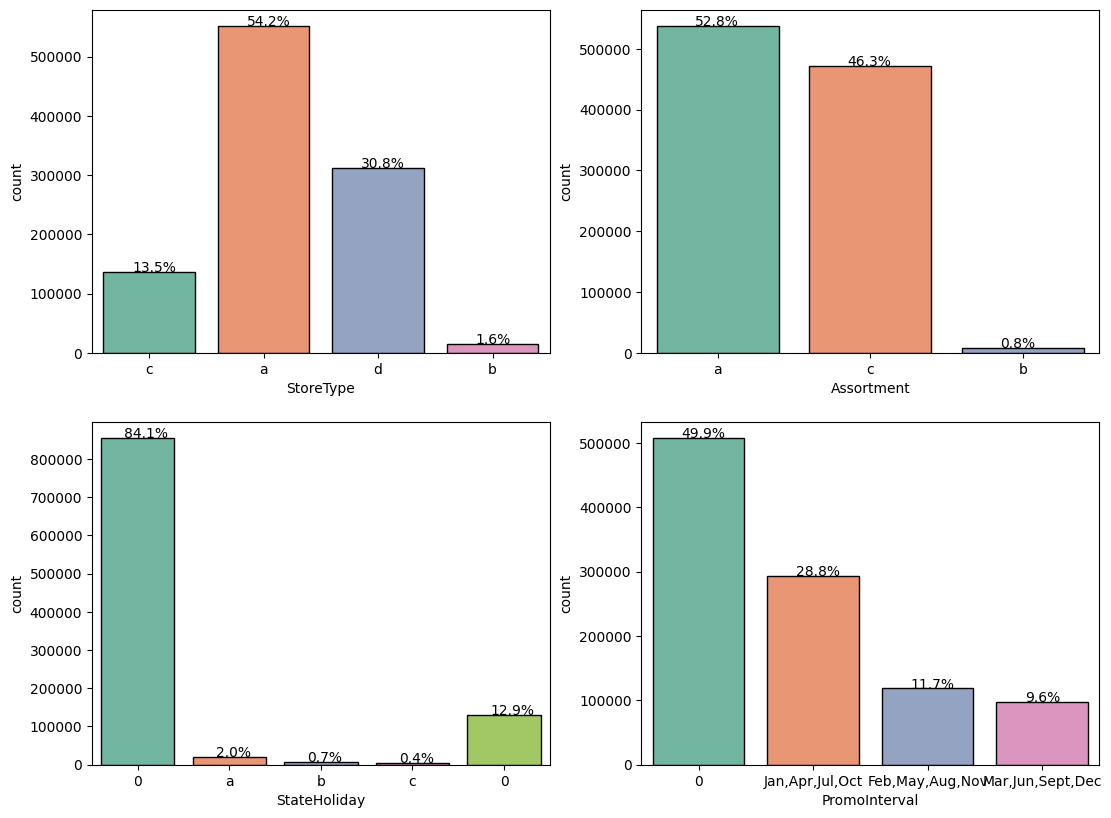

In [ ]:
# Chart - 3 visualization code
# Store type and assortment 
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
ax=sns.countplot(df['StoreType'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['StoreType']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(2,2,2)
ax=sns.countplot(df['Assortment'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(2,2,3)
ax=sns.countplot(df['StateHoliday'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(2,2,4)
ax=sns.countplot(df['PromoInterval'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### **1. Why did you pick the specific chart?**

We plotted above graph to know the distribution of different type of stores,assortment,state holiday and promointerval in the dataset.

##### **2. What is/are the insight(s) found from the chart?**

1. Store Type "a" is most common and Store Type "b" is rare in the dataset .

2. Most of the stores have assortment "a" and assortment "b" is very rare . Since there is significant diffference in the number of occurrence of different store types and assortments , it could indicate that certain store types and assortments are more successful or profitable than others .It could also suggest that certain store types and assortments are more suited to certain types of stores or locations.

3. We can infer that many stores are planning to get prmoted in first quarter of promointerval while number of stores getting promoted in successive quartes is decreasing gradually.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, marketing tactics of store type 'b'.

#### Chart - 4

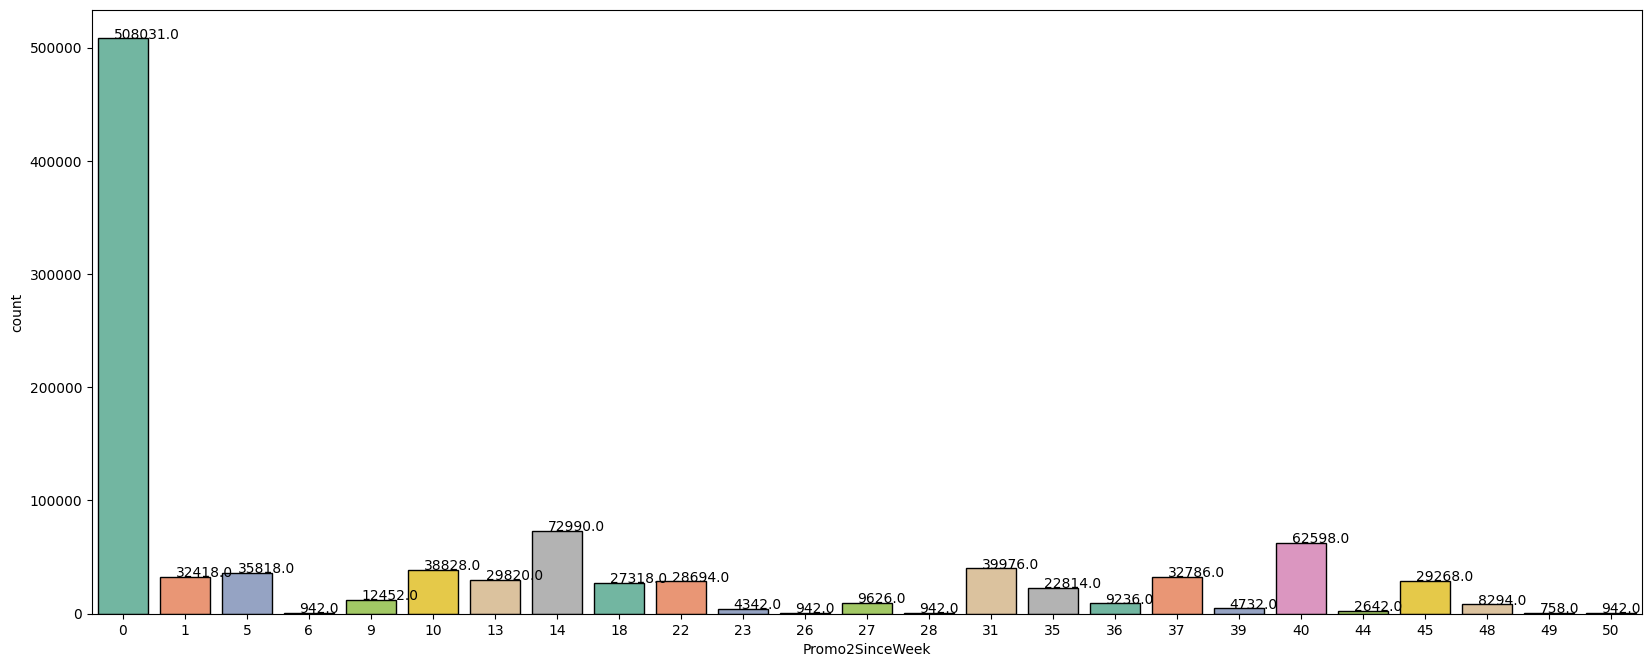

In [ ]:
# Chart - 4 visualization code
# Promo 2 since weeks
plt.figure(figsize=(20,8))

ax=sns.countplot(df['Promo2SinceWeek'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#####**1. Why did you pick the specific chart?**


To see since how many weeks the stores have been praticipating in Promo2 .

##### **2. What is/are the insight(s) found from the chart?**


In this countplot, we can see that 0 has the greatest count . 0 indicates the stores are not participating in promo2 and rest all count indicate the numbers of count of stores , since how many week they have been participating in promo 2.One possibility that stores are not continuing participating in the promo might be customers are less responsive to a second promotion, as they may have already taken advantage of a similar promotion earlier. Another possibility is that the store may not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales.

##### **3.Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

From above graph we can infer that many stores are not continuing participating in the promo which indicates the promotions are not meeting the required targets.

# **Bivariate Analysis**

#### Chart - 5

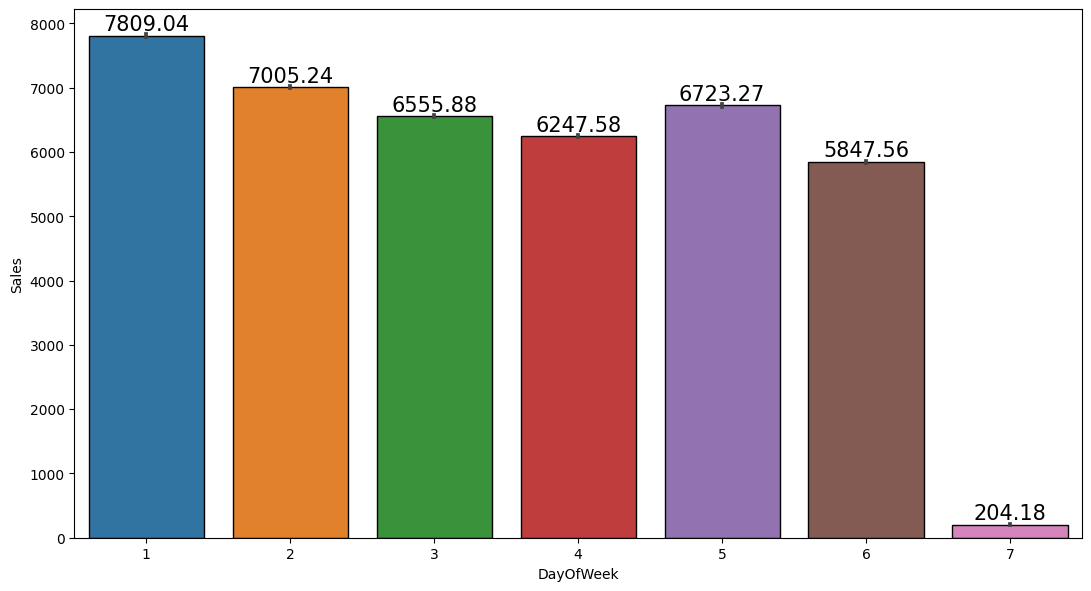

In [ ]:
# Chart - 5 visualization code
# Sales Vs DayOfWeek
plt.figure(figsize=(13,7))
plots=sns.barplot(x=df['DayOfWeek'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### **1. Why did you pick the specific chart?**

We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### **2. What is/are the insight(s) found from the chart?**

Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Since only 2 days are witnessing good sales, store can target remaining 5 days in a week to milk more revenue. It can run exciting offers and attract more customers on weekdays to generate more revenue.



#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Extracting year from Date and creating Year as a new feature for getting Sales vs Year graph
from datetime import date as dt
df["Year"]= df["Date"].dt.year

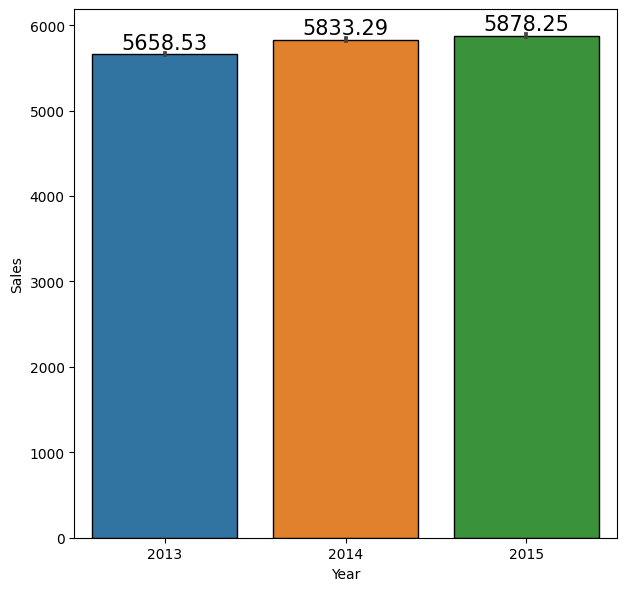

In [ ]:
# Sales vs Year
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Year'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

##### **1. Why did you pick the specific chart?**

We used this plot to visualize the distribution of sales in 2013, 2014 and 2015. Count plots can help us understand how the values of a variable are distributed within the dataset.

##### **2. What is/are the insight(s) found from the chart?**

For any business, year-on-year sales growth is a good parameter to access the store growth. Here we can observe that even though sales are increasing year-on-year, sales growth is not even 10%. So the owners need to put extra efforts to increase the yearly sales.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights from this graph are actually very important for the owners. Since the growth is not at very commendable pace, they need to target more customers and bring some changes in the operations.

#### Chart - 7

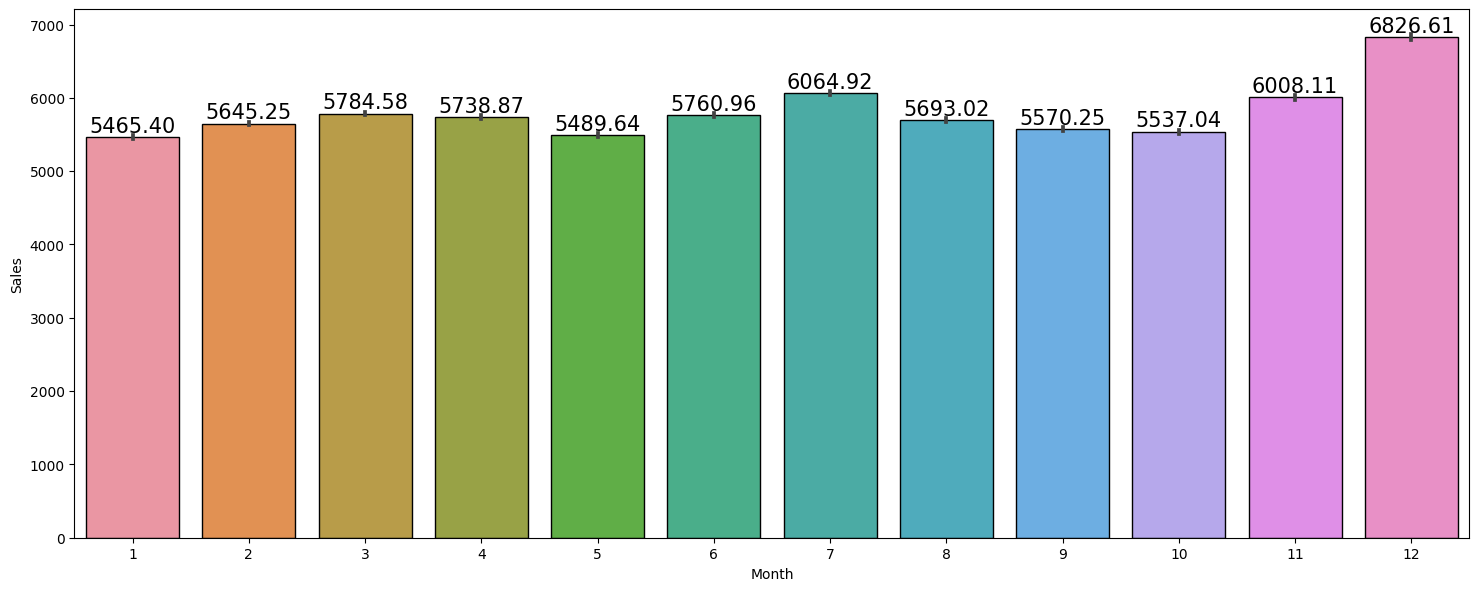

In [ ]:
# Chart - 7 visualization code
# Month vs sales
plt.figure(figsize=(18,7))
plots=sns.barplot(x=df['Date'].dt.month,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Month")

plt.show()

##### **1. Why did you pick the specific chart?**

To know the patterns or trends in the data, such as a peak in activity or sales during a particular month of the year.

##### **2. What is/are the insight(s) found from the chart?**

The countplot highlights that December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely these insights create a positive business impact as business owners will try to keep more goods to cater with the business needs and also they can increase the revenue by keeping stores open even on weekends or holidays as customers are aiming to buy more in this period of month.

#### Chart - 8

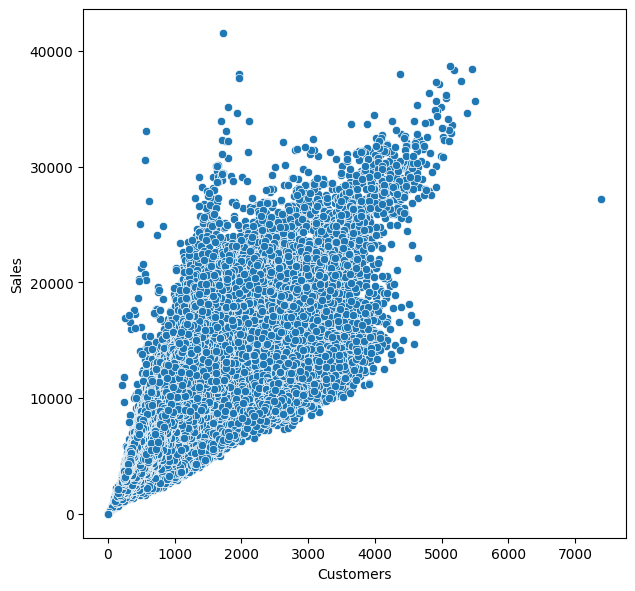

In [ ]:
# Chart - 8 visualization code

# Sale Vs Customer
plt.figure(figsize=(7,7))
sns.scatterplot(df['Customers'],df['Sales'])

##### **1. Why did you pick the specific chart?**


We chose scatter plot because we wanted to plot the relationship between the number of customers visiting the store and the total sales.They are useful for identifying outliers in the data, as well as to determine the correlation between two variables,and to verify the linear trend of our dataset.

##### **2. What is/are the insight(s) found from the chart?**

This above scatterplot show a positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase. We understood from the above trend that our data shows linear trend between these two variables - customers and sales.



##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers and sales are directly proportional to each other and are highly correlated. It can help businesses to promote their strategies using marketing campaigns, advertisements to attract more customers ultimately shooting up the sales.

#### Chart - 9

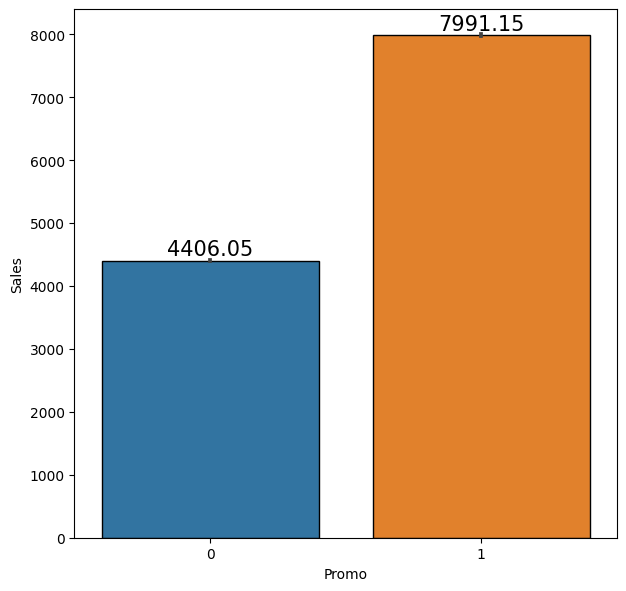

In [ ]:
# Chart - 9 visualization code
# Sales vs Promo
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Promo'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
     

##### **1. Why did you pick the specific chart?**

To know the count of how many sales were made at stores that were running promotions and how many were made at stores that were not running promotions. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### **2. What is/are the insight(s) found from the chart?**

From the above plot we see the effectiveness of promotions on increasing sales. So we can infer that as the stores are getting promoted, sales are increasing on large basis showing positive correlation between promo and sales.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

Business owners should try to promote the stores to sustain in the market eventually resulting increment in the sales amount.

#### **Chart - 10**

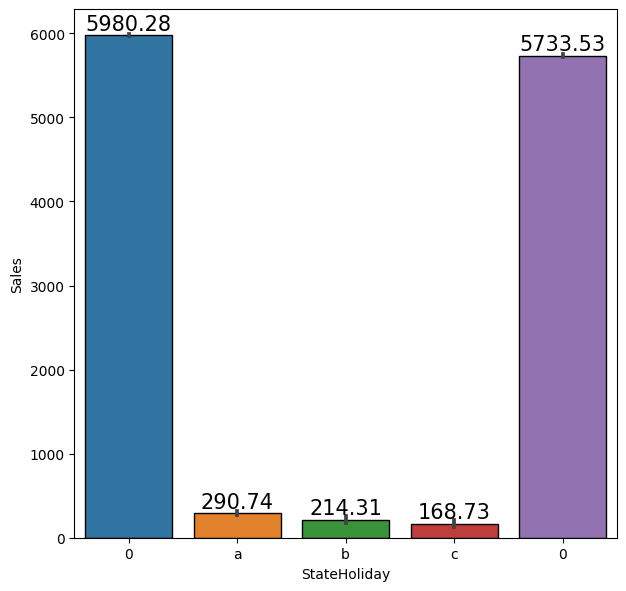

In [ ]:
# Chart - 10 visualization code
# Sales vs StateHoliday
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StateHoliday'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### **1. Why did you pick the specific chart?**

To know the number of sales for various State Holidays .

##### **2. What is/are the insight(s) found from the chart?**


From the above plot, we observe that sales are highest for state holiday 'B' followed by state holiday 'C'. One interesting insight here is sales are comparitively low during normal days(i.e with no state holiday).The factors that contribute to higher sales on these holidays could be increased consumer spending, special promotions or events.

##### **3.Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

The business can create special offers or bundle products to increase the sales during the religious festivals.

#### Chart - 11

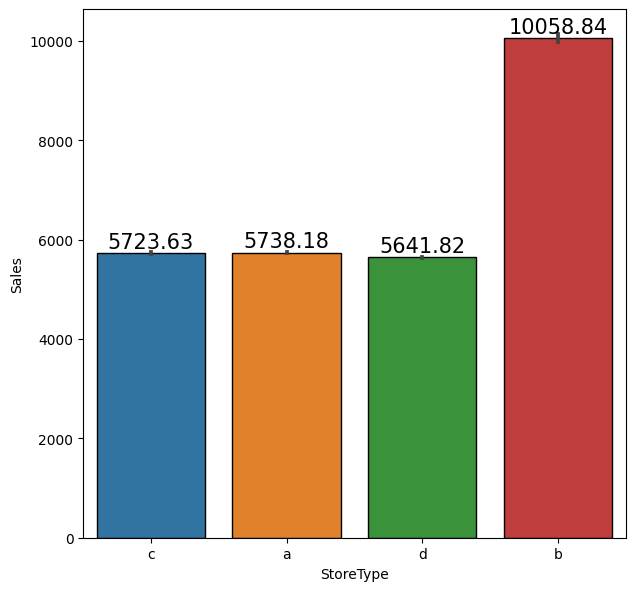

In [ ]:
# Chart - 11 visualization code
# Sales vs StoreType
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


##### **1.Why did you pick the specific char**t?

To know the count of Sales on various store type .




##### **2. What is/are the insight(s) found from the chart?**

Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.


Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, marketing tactics of store type 'b'.

#### Chart - 12

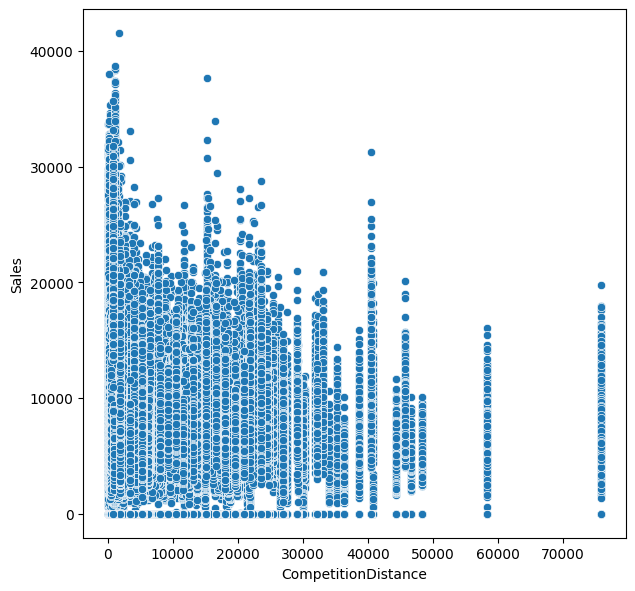

In [ ]:
# Chart - 12 visualization code

# Sales Vs CompetitionDistance
plt.figure(figsize=(7,7))
sns.scatterplot(df['CompetitionDistance'],df['Sales'])

##### **1. Why did you pick the specific chart?**

To know the relationship between the sales and competition distance.

##### **2. What is/are the insight(s) found from the chart?**

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see sales are more for densely located stores.So, stores can continue providing exciting offers and services to attract customers to compete the market.

#### Chart - 13

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

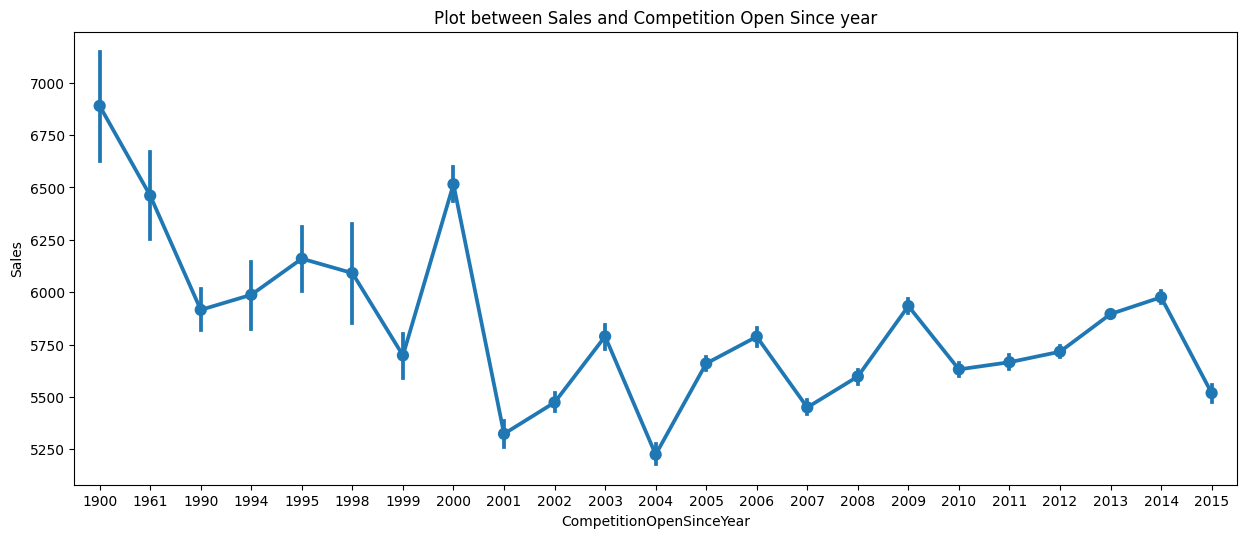

In [ ]:
# Chart - 13 visualization code
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')

##### **1. Why did you pick the specific chart?**

To know the average sales for each year since a competitor opened near the store 

##### 2. What is/are the insight(s) found from the chart?

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

##### **3. Will the gained insights help creating a positive business impact?** 
Are there any insights that lead to negative growth? Justify with specific reason.

Since almost every subsequent year reports sudden drop/rise in the sales, owners need to work on their stockings and marketing tactics. The basic reason for this sudden change could be explored more deeply and a plausible solution to it can be reached.

# **Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap for Playstore data and User review data')

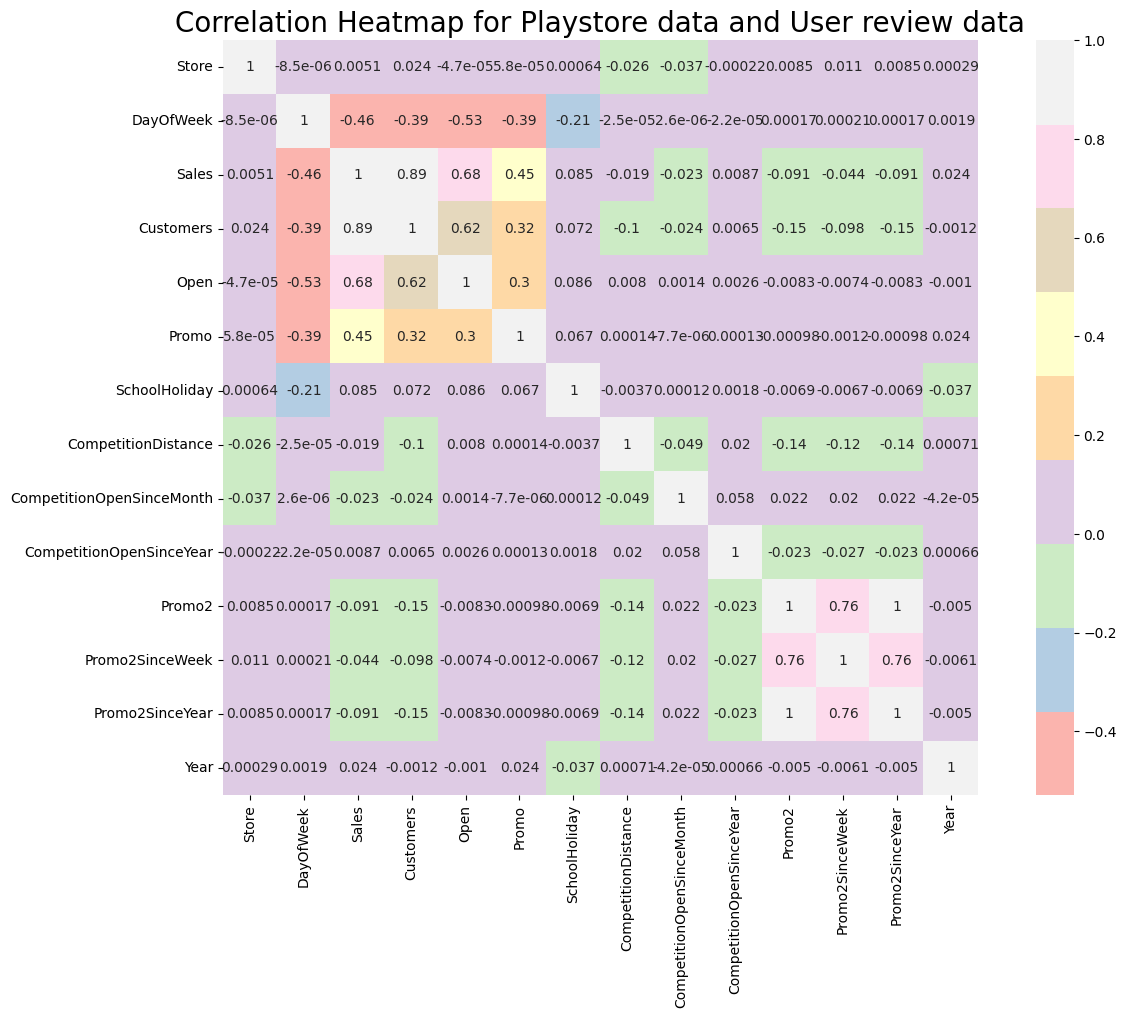

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot= True,cmap=sns.color_palette('Pastel1'),square=True)
plt.title('Correlation Heatmap for Playstore data and User review data', size=20)


##### **1. Why did you pick the specific chart?**

We wanted to check insights of correlation among every two features in the dataset so we choosen this chart(Heatmap).

##### **2. What is/are the insight(s) found from the chart?**

We can infer that some features like Cutomers, promo and SchoolHoliday are positively correlated with Sales. While others like DayofWeek, CompetitionDistance and promo2 are negatively correlated with Sales.Even we can state the correlation within any two independent features with the help of this chart(heatmap)

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. As we can get which features are highly impacting to dependant variable i.e sales, we can focus on it to achieve max sales.

#### Chart - 15 - Pair Plot 

In [ ]:
# # # Pair Plot visualization code
#sns.pairplot(df)

##### 1. Why did you pick the specific chart?

It can give multiple visual aids in a single frame and various insights related to the data can be gained in one single look.

##### 2. What is/are the insight(s) found from the chart?

Pairplot helped us to visualize the relationship between sales and other variables, such as customers, Promotions, competition, and school holidays Columns. This helped us to identify which variables might be useful for predicting sales and inform the design for our machine learning model.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Let's just define three hypothetical statements and perform the needed test

Statement-1

Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

Statement-2

Null Hypothesis - There is no relation between DayOfWeek and Sales

Alternate Hypothesis - There is a relationship between DayOfWeek and sales

Statement-3

Null Hypothesis - There is no relation between SchoolHoliday and Sales

Alternate Hypothesis - There is a relationship between SchoolHoliday and Sales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Customers"].head(1500)
second_sample = df["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.972, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.939 which implies that theses two features are having strong positive correlation between them.Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between DayOfWeek and Sales

Alternate Hypothesis - There is a relationship between DayOfWeek and sales



#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["DayOfWeek"].head(1500)
second_sample = df["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')
     

stat=-0.590, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on DayOfWeek and sales features we got Correlation coefficient as -0.221 which implies that theses two features are having weak negative correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between SchoolHoliday and Sales

Alternate Hypothesis - There is a relationship between SchoolHoliday and Sales

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["SchoolHoliday"].head(1500)
second_sample = df["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.068, p = 0.01
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.334 which implies that theses two features are having weak positive correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
dtype: int64

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### **2. Handling Outliers**

**Univariate analysis of Outliers**

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


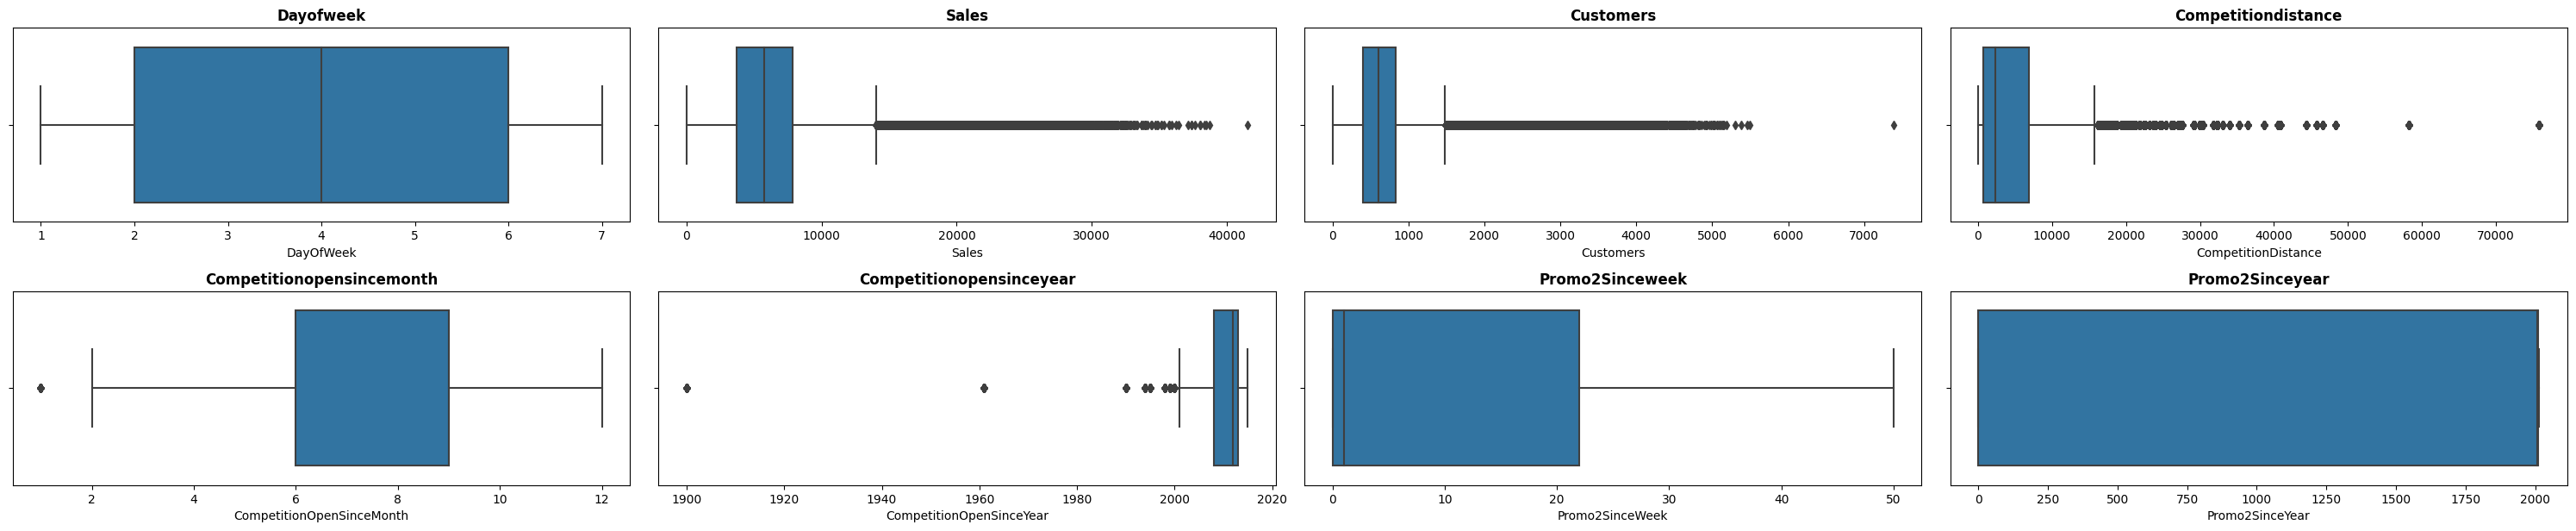

In [ ]:
# checking outliers with the help of box plot for continous features
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
# checking the features having dtype as object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Clearly we have "StoreType", "Assortment", "PromoInterval" as "object". To feed them as an input of our Machine Learning algorithm, we need to use some encoding technique to make dtype of these column as "integer".

In [ ]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")
     

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




Since we have several encoding techniques but the major ones are:

**Ordinal encoding**: Used when the features are ordinal in nature and have some rank between them.

**Nominal encoding**: Used when the features have equal weightage and are nominal in nature.
As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:



In [ ]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
df_new=df.copy() 

In [ ]:
# Encode your categorical columns by dropping the first category
# df_new= pd.get_dummies(df, dtype=int)


We can use the above code to create binary dummy variable using ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So its better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier.

In [ ]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(df, dtype=int, drop_first=True)

In [ ]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [ ]:
# Let's see first five observations of our dataset
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  Year  \
0                      2008       0                0                0  2015   
1                      2008       0                0                0  2015   
2                      2008       0                0                0  2015   
3                      2008       0                0                0  2015   
4                      2008       0                0                0  2015   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [ ]:
# Verifying the dtype
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

**What all categorical encoding techniques have you used & why did you use those techniques?**

a. We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

b. Since, we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique than ordinal.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**We don't have textual data in any of the feature so it is not needed for our project**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

#### **1. Feature Engineering**


In [ ]:
#checking top 5 rows of the dataset to proceed with feature engineering
df_new.head()


Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  Year  \
0                      2008       0                0                0  2015   
1                      2008       0                0                0  2015   
2                      2008       0                0                0  2015   
3                      2008       0                0                0  2015   
4                      2008       0                0                0  2015   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [ ]:
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week
     

In [ ]:
#checking first 5 observations
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   
2      1          3 2015-07-29   4782        523     1      1             0   
3      1          2 2015-07-28   5011        560     1      1             0   
4      1          1 2015-07-27   6102        612     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  Year  \
0                      2008       0                0                0  2015   
1                      2008       0                0                0  2015   
2                      2008       0                0                0  2015   
3                      2008       0                0                0  2015   
4                      2008       0                0                0  2015   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Week  
0                               0   31      7    31  
1                               0   30      7    31  
2                               0   29      7    31  
3                               0   28      7    31  
4                               0   27      7    31

In [ ]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is involved in promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [ ]:
# checking first 5 observations after feature extraction
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      1          4 2015-07-30   5020        546      1             0   
2      1          3 2015-07-29   4782        523      1             0   
3      1          2 2015-07-28   5011        560      1             0   
4      1          1 2015-07-27   6102        612      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                 1270                          9   
2              1                 1270                          9   
3              1                 1270                          9   
4              1                 1270                          9   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  Year  \
0                      2008       0                0                0  2015   
1                      2008       0                0                0  2015   
2                      2008       0                0                0  2015   
3                      2008       0                0                0  2015   
4                      2008       0                0                0  2015   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Week  CompetitionDuration  \
0                               0   31      7    31                   82   
1                               0   30      7    31                   82   
2                               0   29      7    31                   82   
3                               0   28      7    31                   82   
4                               0   27      7    31                   82   

   PromoDuration  
0              0  
1              0  
2              0  
3              0  
4              0

We have noticed that some of the observations in "Open" are 0 that means store are closed.

**Checking and Treating Multicollinearity**

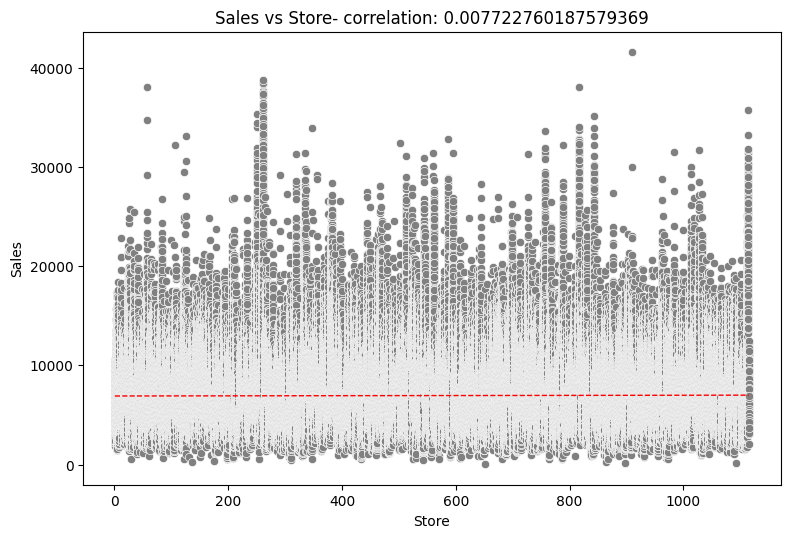

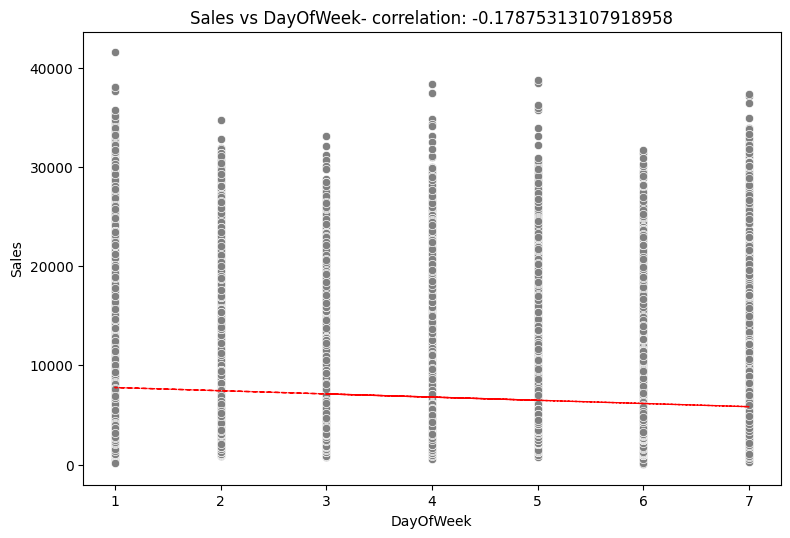

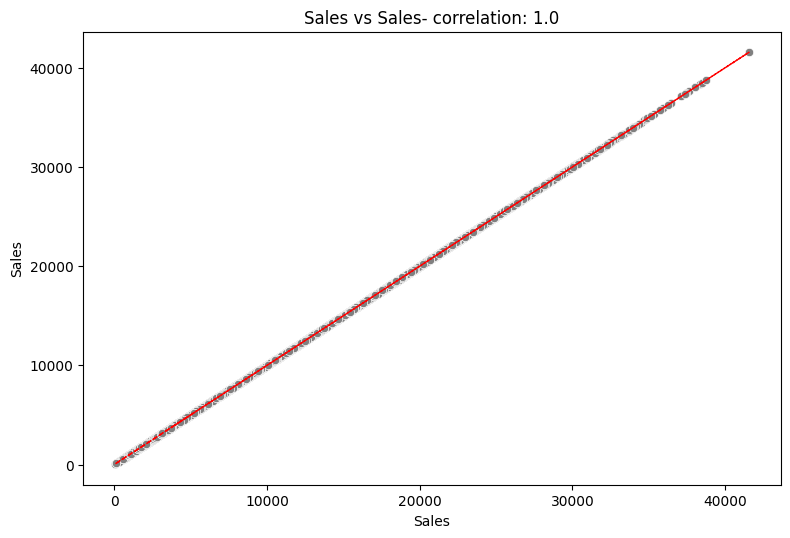

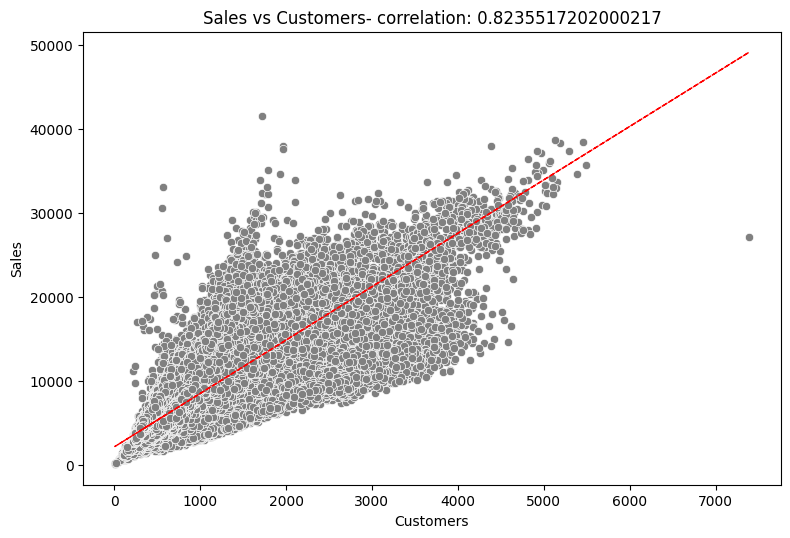

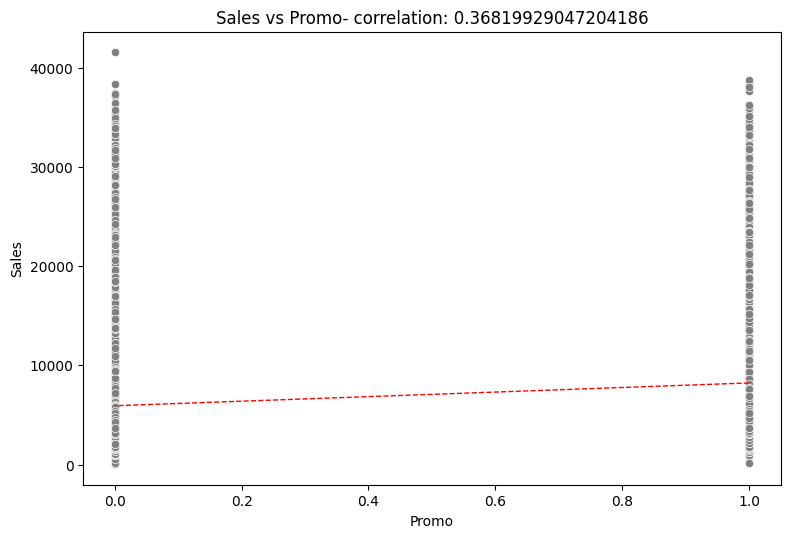

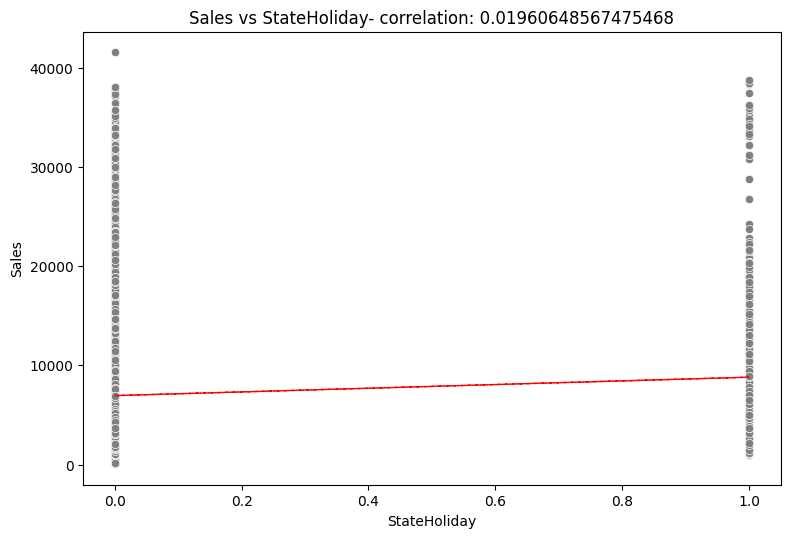

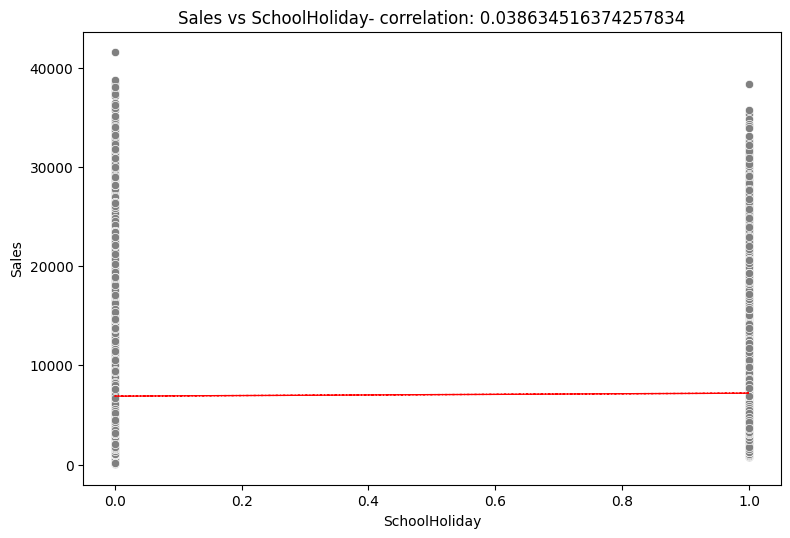

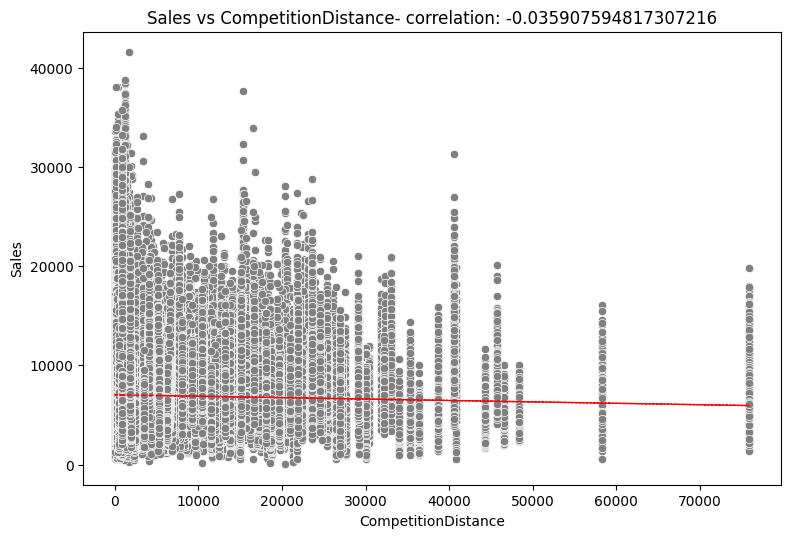

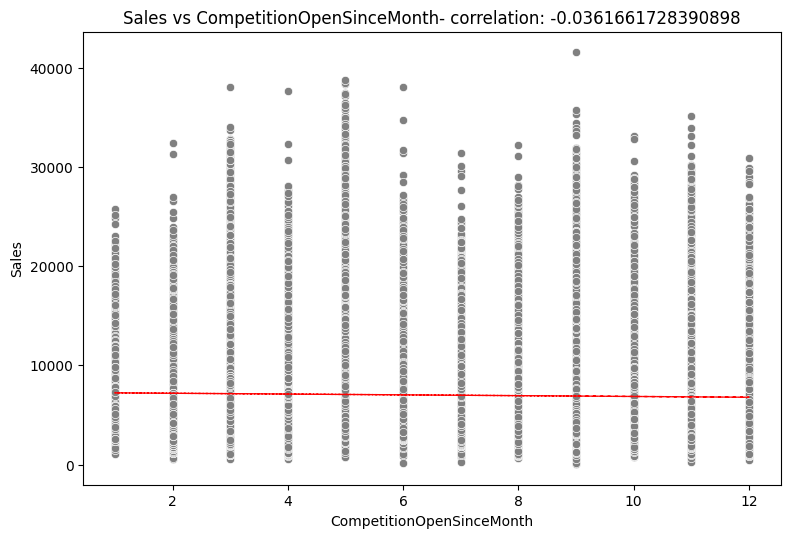

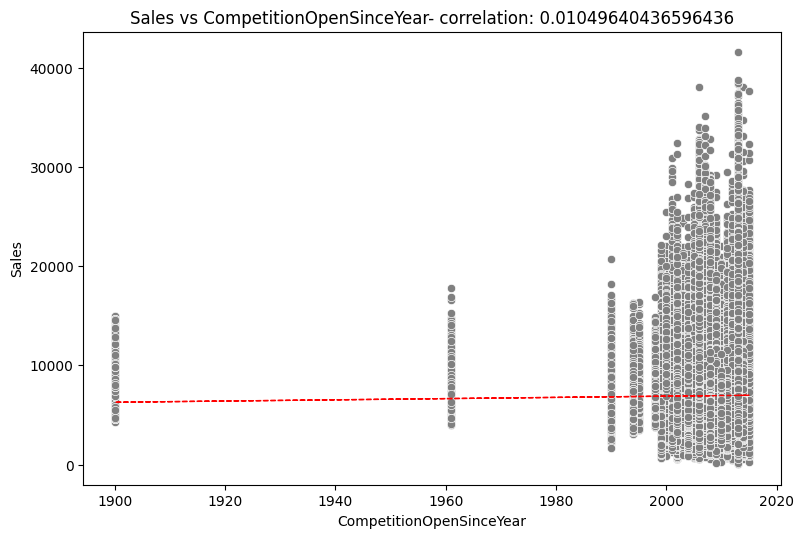

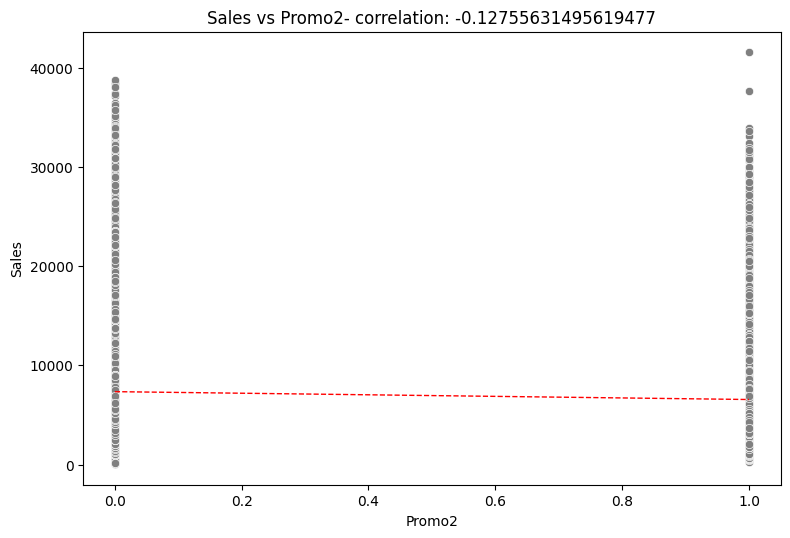

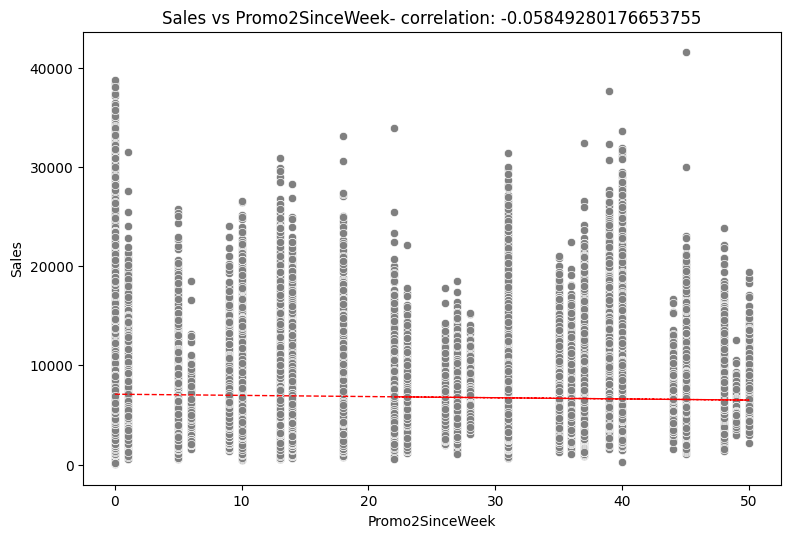

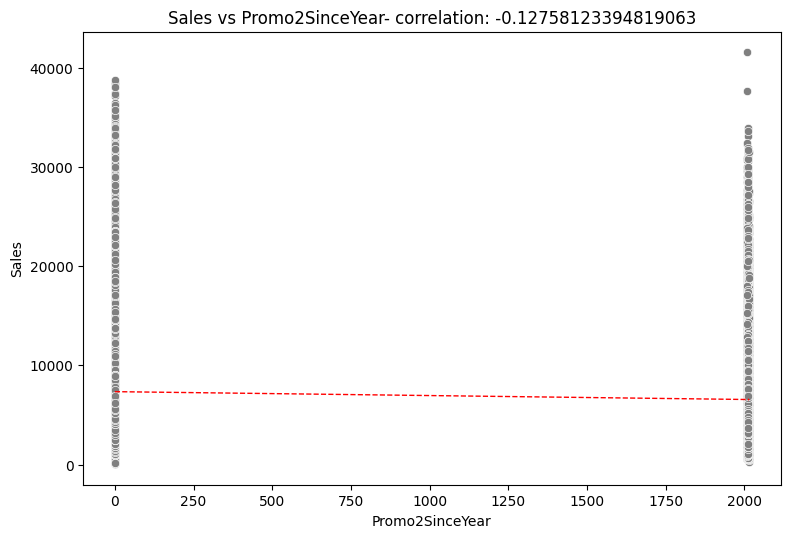

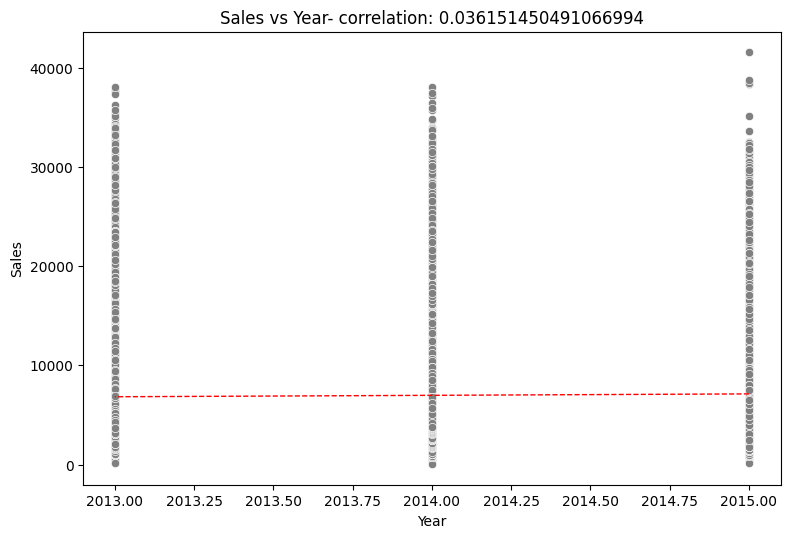

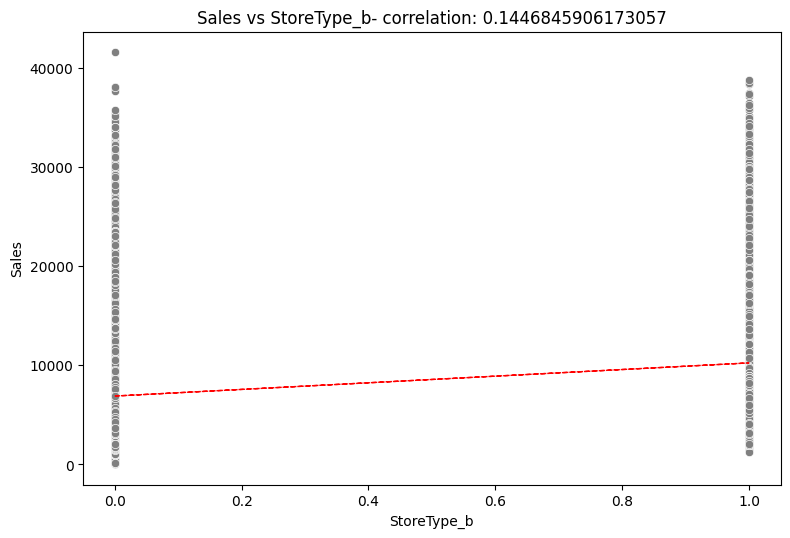

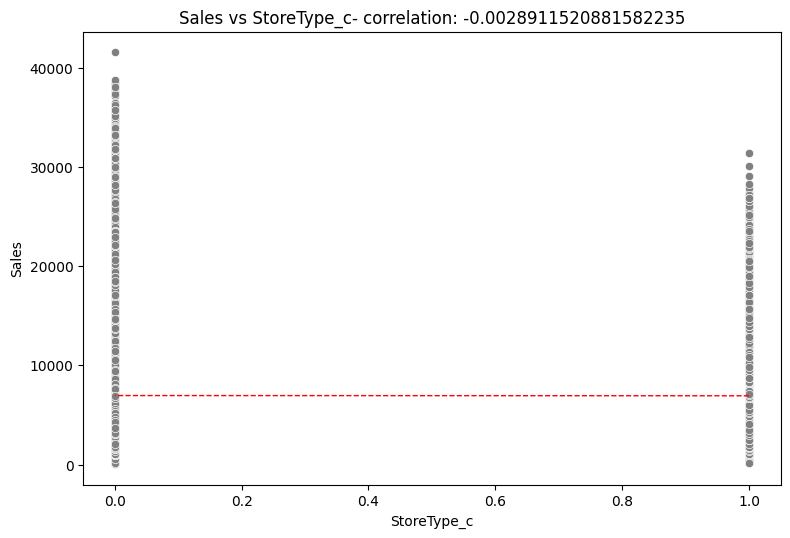

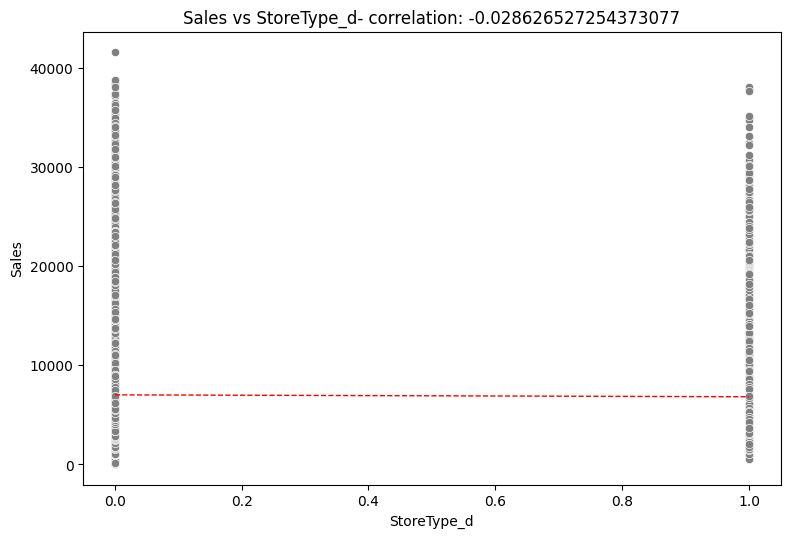

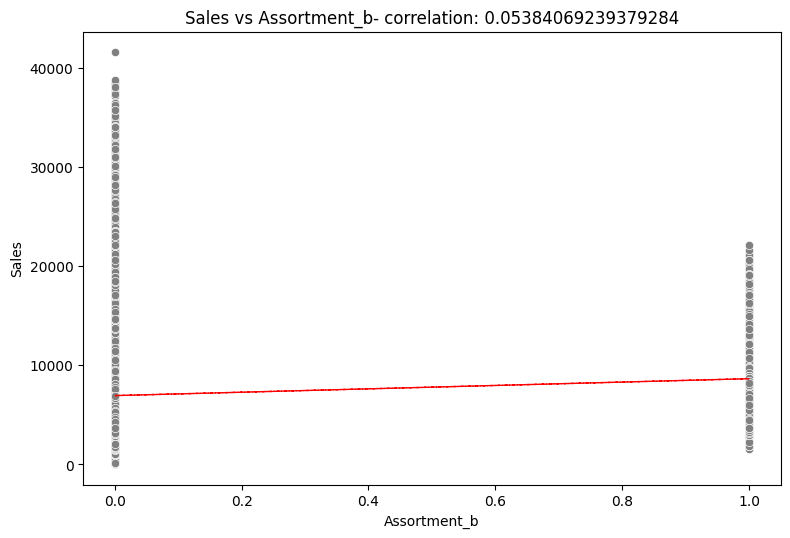

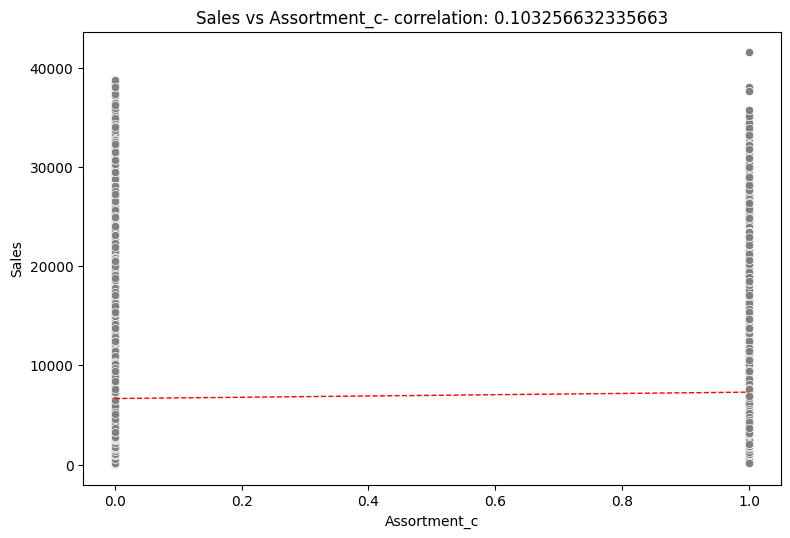

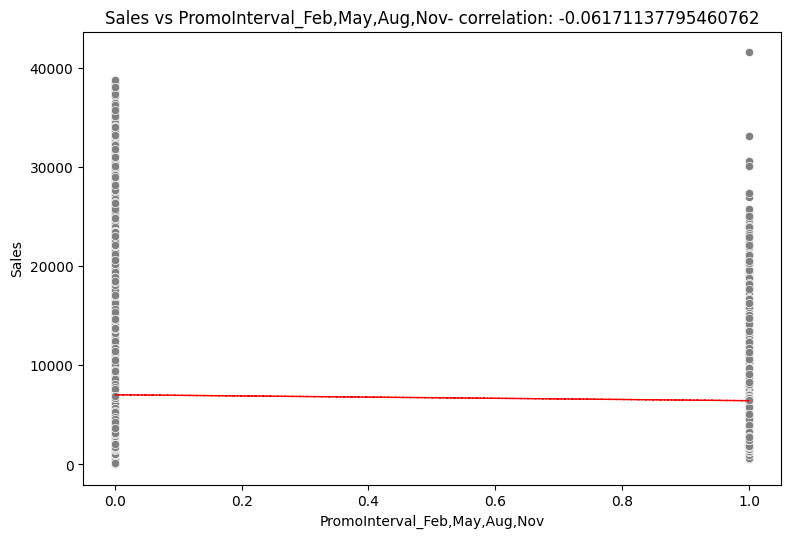

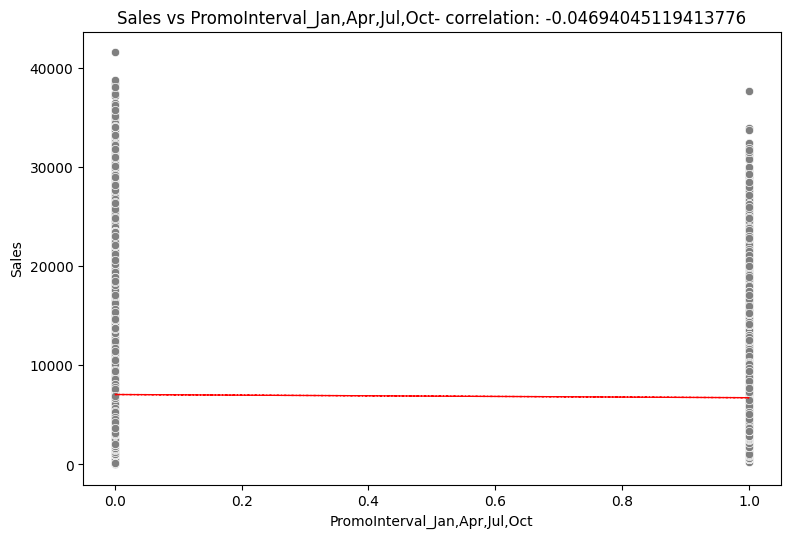

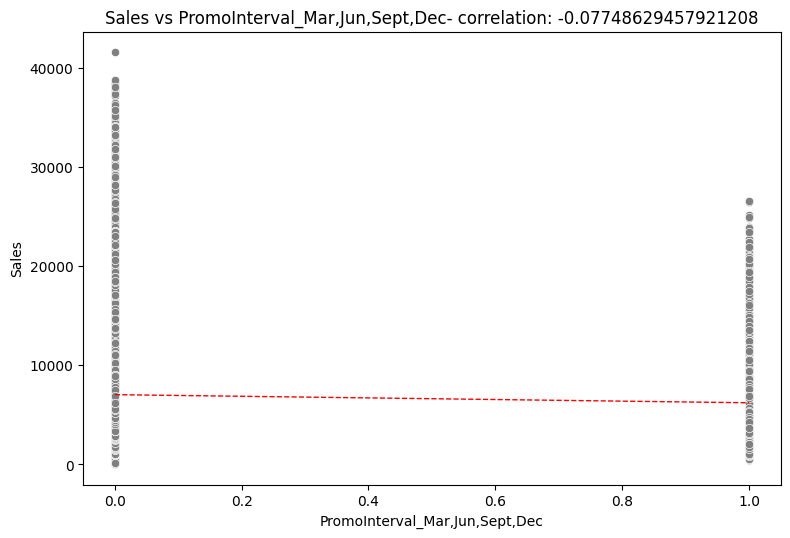

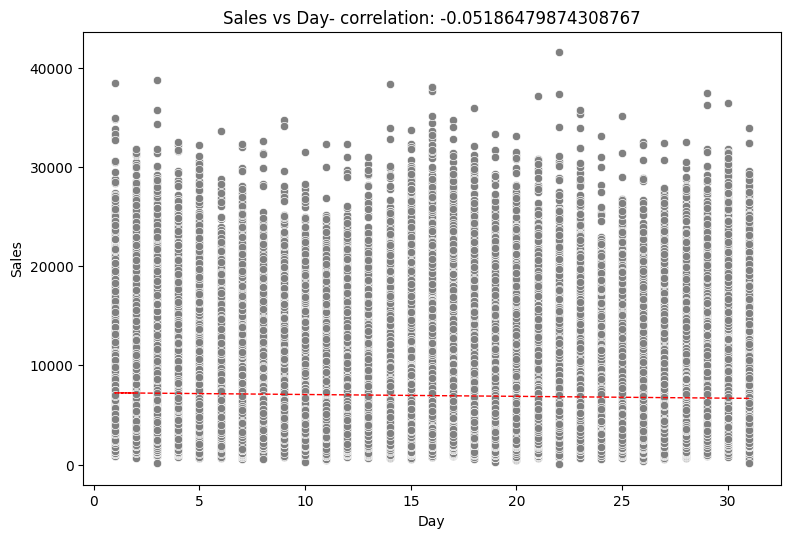

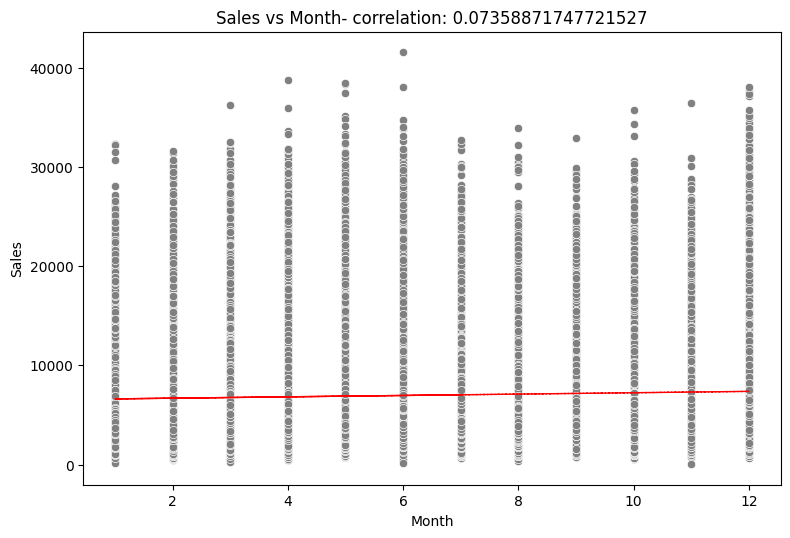

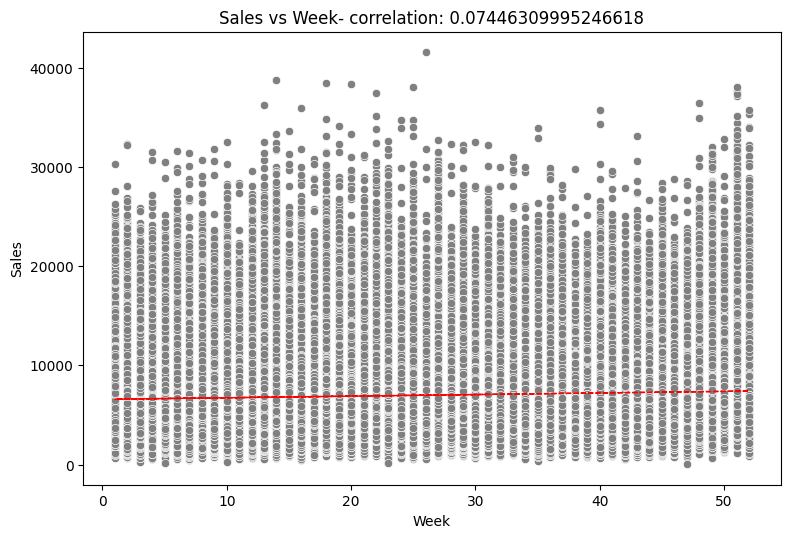

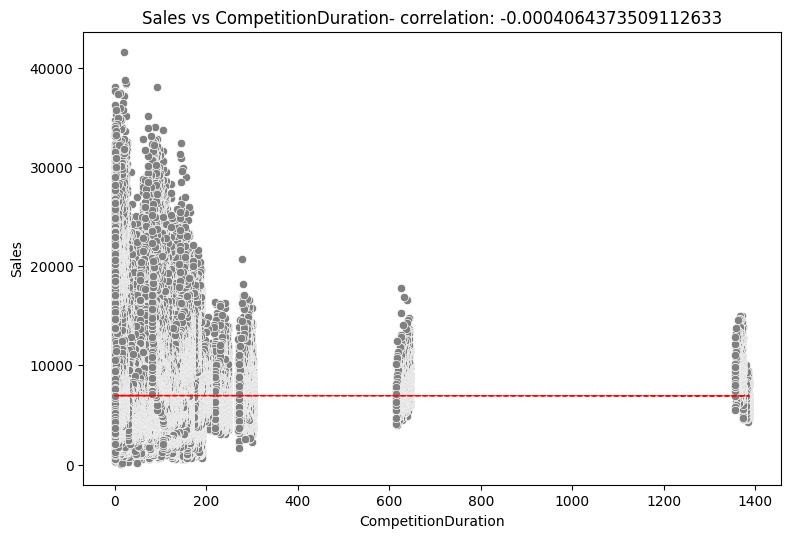

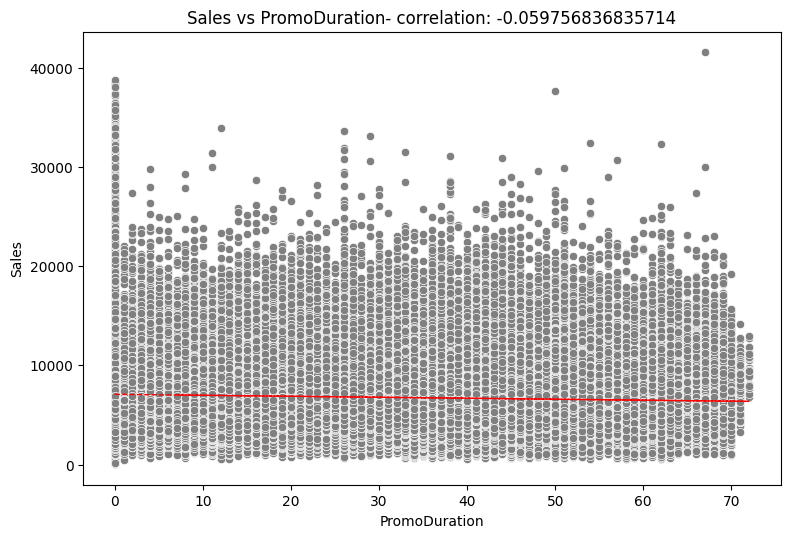

In [ ]:
# Let's see how sales and other features are related
for col in df_new.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_new[col]
    label = df_new['Sales']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_new[col], df_new['Sales'], 1)
    y_hat = np.poly1d(z)(df_new[col])
    plt.plot(df_new[col], y_hat, "r--", lw=1)
    plt.show()

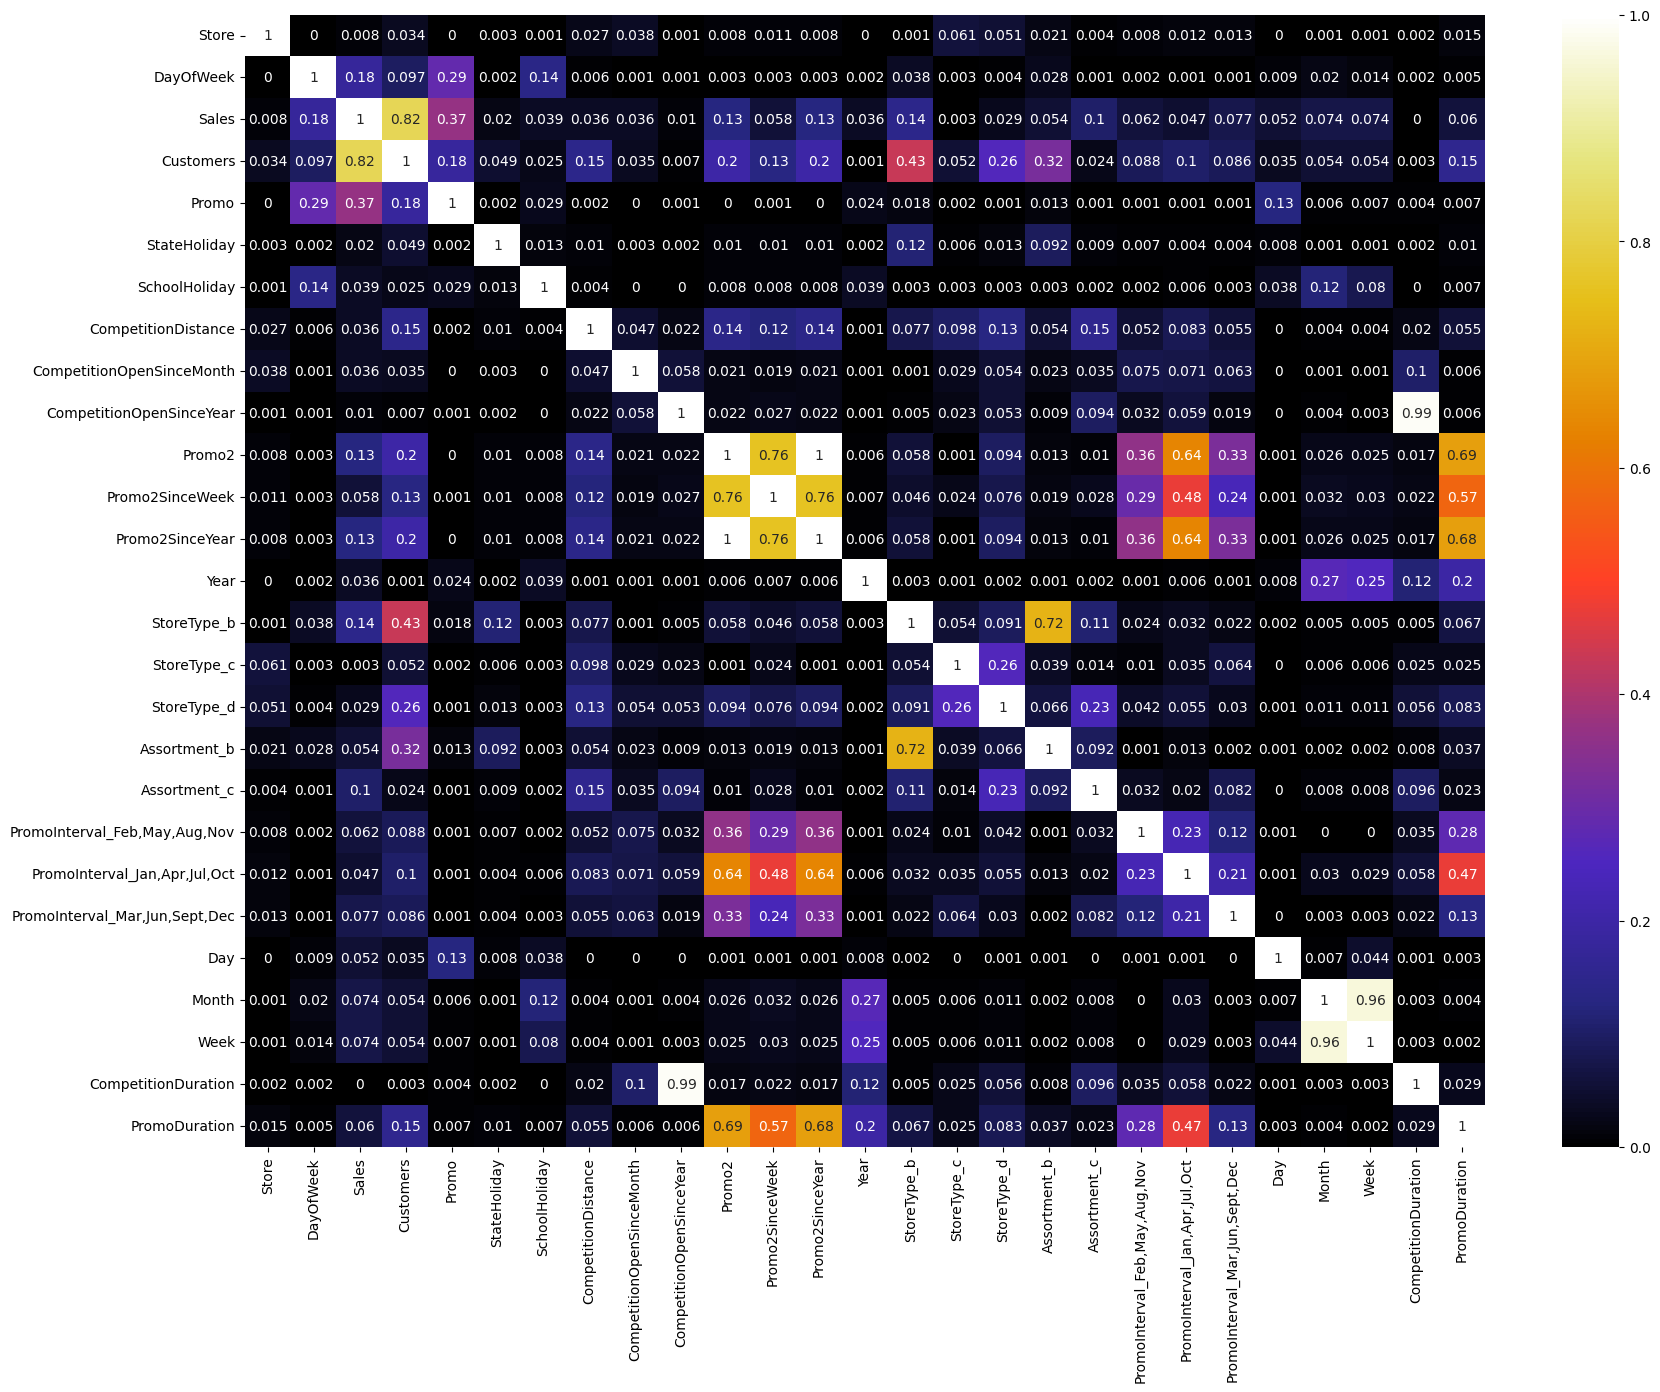

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df_new.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

Observations from the matrix:

Promo2 is highly correlated with promo2sinceYear and promo2sinceWeek

Let's verify multicollinearity by applying VIF algorithm

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Month", "Year", "Week"]]])

variables       VIF
0                        DayOfWeek  3.905453
1                        Customers  4.730412
2                            Promo  1.933066
3                     StateHoliday  1.015665
4                    SchoolHoliday  1.239442
5              CompetitionDistance  1.547287
6                           Promo2       inf
7                      StoreType_b  2.373482
8                      StoreType_c  1.254922
9                      StoreType_d  1.689885
10                    Assortment_b  2.123661
11                    Assortment_c  2.070121
12   PromoInterval_Feb,May,Aug,Nov       inf
13   PromoInterval_Jan,Apr,Jul,Oct       inf
14  PromoInterval_Mar,Jun,Sept,Dec       inf
15                             Day  3.602059
16             CompetitionDuration  1.467375
17                   PromoDuration  2.842231

Since, "Promo2","PromoInterval_Jan,Apr,Jul,Oct", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" are having high VIF values and "PromoInterval_Jan,Apr,Jul,Oct" is having least corelation with "Sales". So, let's exclude "PromoInterval_Jan,Apr,Jul,Oct"

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct"]]])

variables       VIF
0                        DayOfWeek  3.905453
1                        Customers  4.730412
2                            Promo  1.933066
3                     StateHoliday  1.015665
4                    SchoolHoliday  1.239442
5              CompetitionDistance  1.547287
6                           Promo2  4.634539
7                      StoreType_b  2.373482
8                      StoreType_c  1.254922
9                      StoreType_d  1.689885
10                    Assortment_b  2.123661
11                    Assortment_c  2.070121
12   PromoInterval_Feb,May,Aug,Nov  1.409783
13  PromoInterval_Mar,Jun,Sept,Dec  1.373222
14                             Day  3.602059
15             CompetitionDuration  1.467375
16                   PromoDuration  2.842231

Since "Assortment_b" and "Store_type_b" are also showing high corelation i.e 0.72 so we are gaining same information from both the features. Its better to exclude the feature "Assortment_b" which is having less corelation with Sales(0.047).

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b"]]])

variables       VIF
0                        DayOfWeek  3.904454
1                        Customers  4.728498
2                            Promo  1.932703
3                     StateHoliday  1.015524
4                    SchoolHoliday  1.239409
5              CompetitionDistance  1.547113
6                           Promo2  4.630332
7                      StoreType_b  1.276090
8                      StoreType_c  1.254916
9                      StoreType_d  1.689881
10                    Assortment_c  2.068870
11   PromoInterval_Feb,May,Aug,Nov  1.409542
12  PromoInterval_Mar,Jun,Sept,Dec  1.373027
13                             Day  3.601533
14             CompetitionDuration  1.467196
15                   PromoDuration  2.841531

Since "Promo2" and "PromoDuration" are highly correlated having correlation 0.69 and "PromoDuration" is least correlated with "Sales". So, let's exclude "PromoDuration" from VIF.

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month","Week", "Year", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b","PromoDuration"]]])

variables       VIF
0                        DayOfWeek  3.903853
1                        Customers  4.728333
2                            Promo  1.932681
3                     StateHoliday  1.015523
4                    SchoolHoliday  1.239376
5              CompetitionDistance  1.541783
6                           Promo2  2.664332
7                      StoreType_b  1.275103
8                      StoreType_c  1.250959
9                      StoreType_d  1.687633
10                    Assortment_c  2.063206
11   PromoInterval_Feb,May,Aug,Nov  1.409374
12  PromoInterval_Mar,Jun,Sept,Dec  1.350791
13                             Day  3.601472
14             CompetitionDuration  1.466880

We are getting very good VIF's (Less then 10). Now let's move forward and store the selected features in a new dataframe.

In [ ]:
# New Dataframe which will be our final dataframe
final_df = df_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales"]]

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling


Before scaling our data let's just seperate our "x" and "y" variables as we do not have to scale our y variable (Target variable).

In [ ]:
# Separating "x" and "y" variables
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

(844338, 15)
(844338, 1)


In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating object
std_regressor= StandardScaler()

In [ ]:
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

##### What data splitting ratio have you used and why? 

Since our dataset is huge obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

### **ML Model - 1       Liner Regression**

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train, y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 957.7458458937056
MAE on test is: 955.2410954479205
--------------------------------------------------
MSE on train is: 1780046.4340075373
MSE on test is: 1774040.7740012081
--------------------------------------------------
RMSE on train is: 1334.1838081791943
RMSE on test is: 1331.9312196961253
--------------------------------------------------
MAPE on train is: 14.581002147904806  %
MAPE on test is: 14.51278943848867  %
--------------------------------------------------
R2 on train is: 0.8154413265094402
R2 on test is: 0.8149877132092133
--------------------------------------------------
Accuracy of train is: 85.41899785209519  %
Accuracy of test is: 85.48721056151133  %
--------------------------------------------------


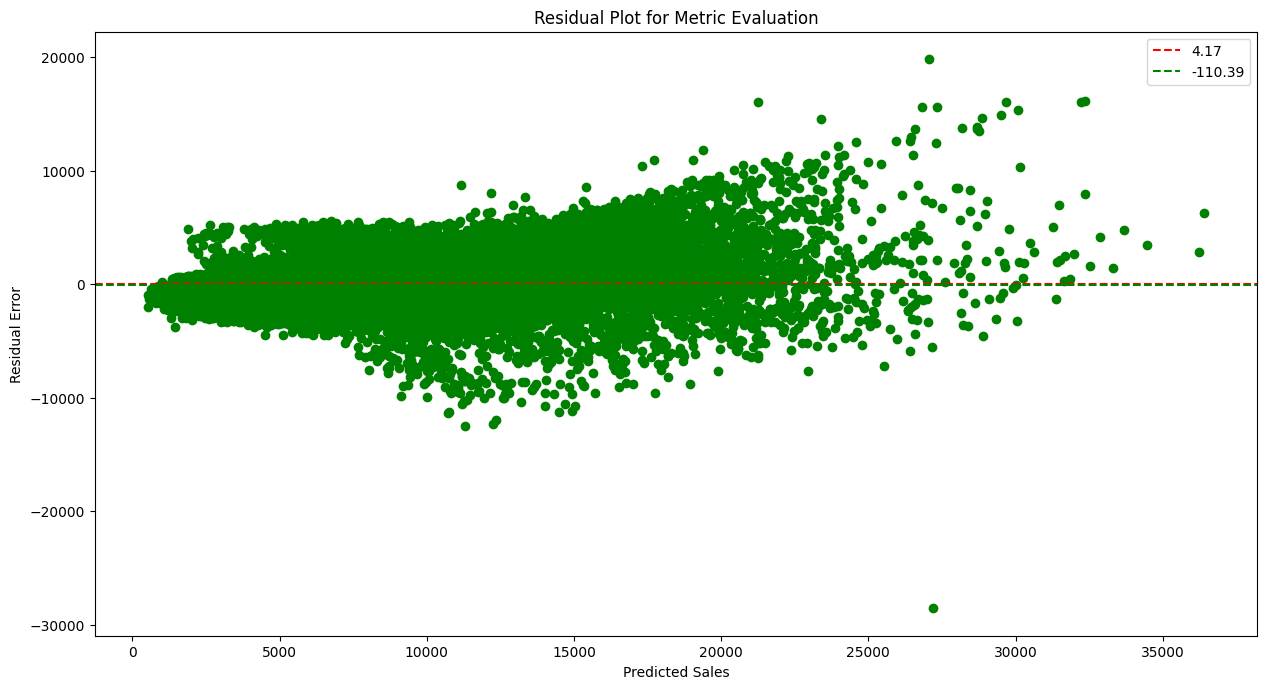

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="green")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

 We have tried to evaluate the most important regression metics on both the train and test datesets so that we can conclude our ML model. Here for Linear Regression, we can observe that both the r2 scores are pretty close which explains that on test dataset and our model is following the correct way.

#### 2. Cross- Validation & Hyperparameter Tuning

# **Ridge Regression**

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 11, 'max_iter': 1}
Negative mean square error is: -1780184.2154516422


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 957.7482383808403
MAE on test is: 955.2435987198622
--------------------------------------------------
MSE on train is: 1780046.4385152692
MSE on test is: 1774040.8229848302
--------------------------------------------------
RMSE on train is: 1334.1838098685164
RMSE on test is: 1331.9312380843203
--------------------------------------------------
MAPE on train is: 14.58110391206511  %
MAPE on test is: 14.512893150691026  %
--------------------------------------------------
R2 on train is: 0.8154413260420699
R2 on test is: 0.8149877081007783
--------------------------------------------------
Accuracy of train is: 85.41889608793488  %
Accuracy of test is: 85.48710684930897  %
--------------------------------------------------


# **Lasso Regression**

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 10}
Negative mean square error is: -1780194.4458129122


In [ ]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

--------------------------------------------------
MAE on train is: 957.7452926304236
MAE on test is: 955.2405457031077
--------------------------------------------------
MSE on train is: 1780046.4341006377
MSE on test is: 1774040.774528113
--------------------------------------------------
RMSE on train is: 1334.1838082140848
RMSE on test is: 1331.9312198939226
--------------------------------------------------
MAPE on train is: 14.58098219497092  %
MAPE on test is: 14.512769587721156  %
--------------------------------------------------
R2 on train is: 0.8154413264997874
R2 on test is: 0.8149877131542631
--------------------------------------------------
Accuracy of train is: 85.41901780502909  %
Accuracy of test is: 85.48723041227885  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso and Ridge regression we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest.

### ML Model - 2

# Decision **Trees**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=16) 
  
# fit the regressor with X and Y data
TreeR.fit(x_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(x_train)
y_test_tree_pred= TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

--------------------------------------------------
MAE on train is: 447.30183861294375
MAE on test is: 528.9142650414948
--------------------------------------------------
MSE on train is: 433375.475873052
MSE on test is: 618196.6173987247
--------------------------------------------------
RMSE on train is: 658.3125973829242
RMSE on test is: 786.2548043724278
--------------------------------------------------
MAPE on train is: 6.725581736767849  %
MAPE on test is: 7.780258077484557  %
--------------------------------------------------
R2 on train is: 0.9550667884711305
R2 on test is: 0.935529119991247
--------------------------------------------------
Accuracy of train is: 93.27441826323215  %
Accuracy of test is: 92.21974192251544  %
--------------------------------------------------


In [ ]:
# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

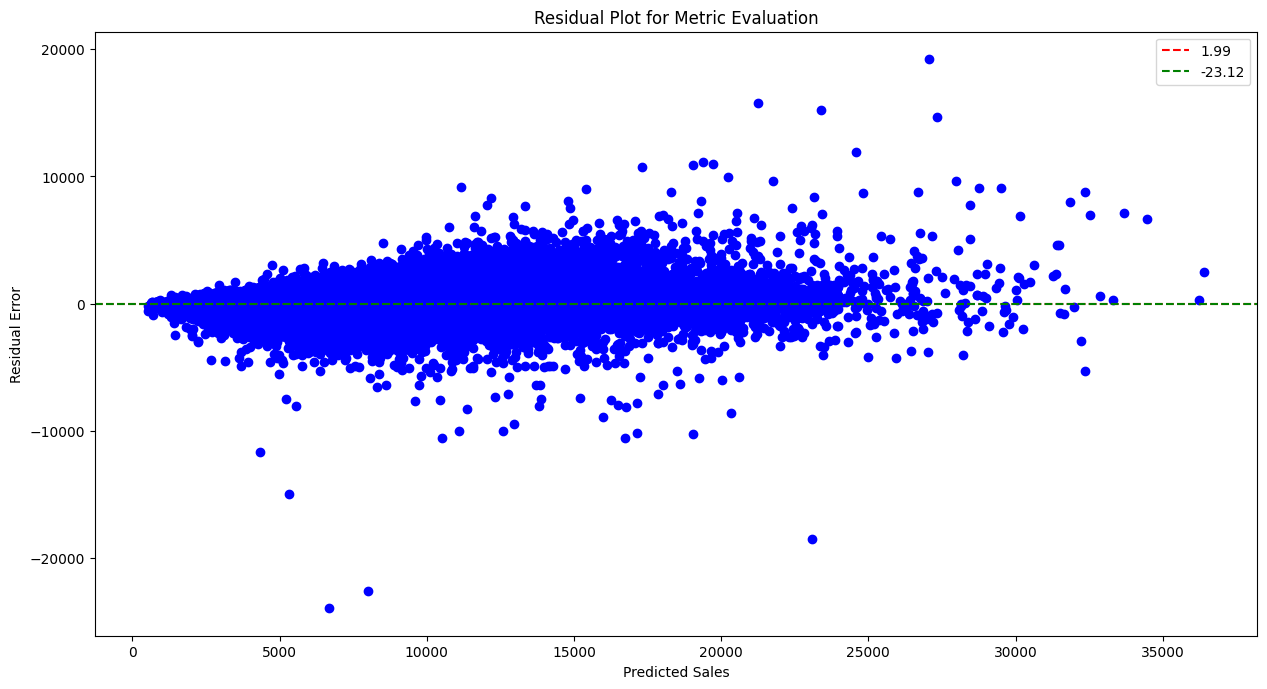

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="blue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_DT), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_DT), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.75 to 0.90 that means "90% Variance of our test dataset is captured by our trained model" which is excellent. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

Decision Tree with GridSearchCV

In [ ]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(x_train)
y_test_grid_Dtree_pred = decision_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

The best alpha value found out to be: {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 4}
Negative mean square error is: -569700.8479961859


In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)

--------------------------------------------------
MAE on train is: 390.79292009467986
MAE on test is: 473.24375355441776
--------------------------------------------------
MSE on train is: 344816.41765052173
MSE on test is: 507301.3647340444
--------------------------------------------------
RMSE on train is: 587.2107097546176
RMSE on test is: 712.2509141686267
--------------------------------------------------
MAPE on train is: 5.762053551120319  %
MAPE on test is: 6.919711684354484  %
--------------------------------------------------
R2 on train is: 0.9642487637268693
R2 on test is: 0.9470942342718282
--------------------------------------------------
Accuracy of train is: 94.23794644887968  %
Accuracy of test is: 93.08028831564552  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 4} which resulted into the improvement in the MSE from 22% to 19% on the test set.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the sales, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~96% and ~3% far from the mean of actual absolute values.

### ML Model - 3

# **Random Forest Regression**

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(x_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

--------------------------------------------------
MAE on train is: 304.2497301491596
MAE on test is: 397.77367682149196
--------------------------------------------------
MSE on train is: 191171.51647783234
MSE on test is: 345198.0612114021
--------------------------------------------------
RMSE on train is: 437.2316508189135
RMSE on test is: 587.5355829321337
--------------------------------------------------
MAPE on train is: 4.567679264165574  %
MAPE on test is: 5.863500696518192  %
--------------------------------------------------
R2 on train is: 0.9801789656627699
R2 on test is: 0.963999766162971
--------------------------------------------------
Accuracy of train is: 95.43232073583442  %
Accuracy of test is: 94.13649930348181  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

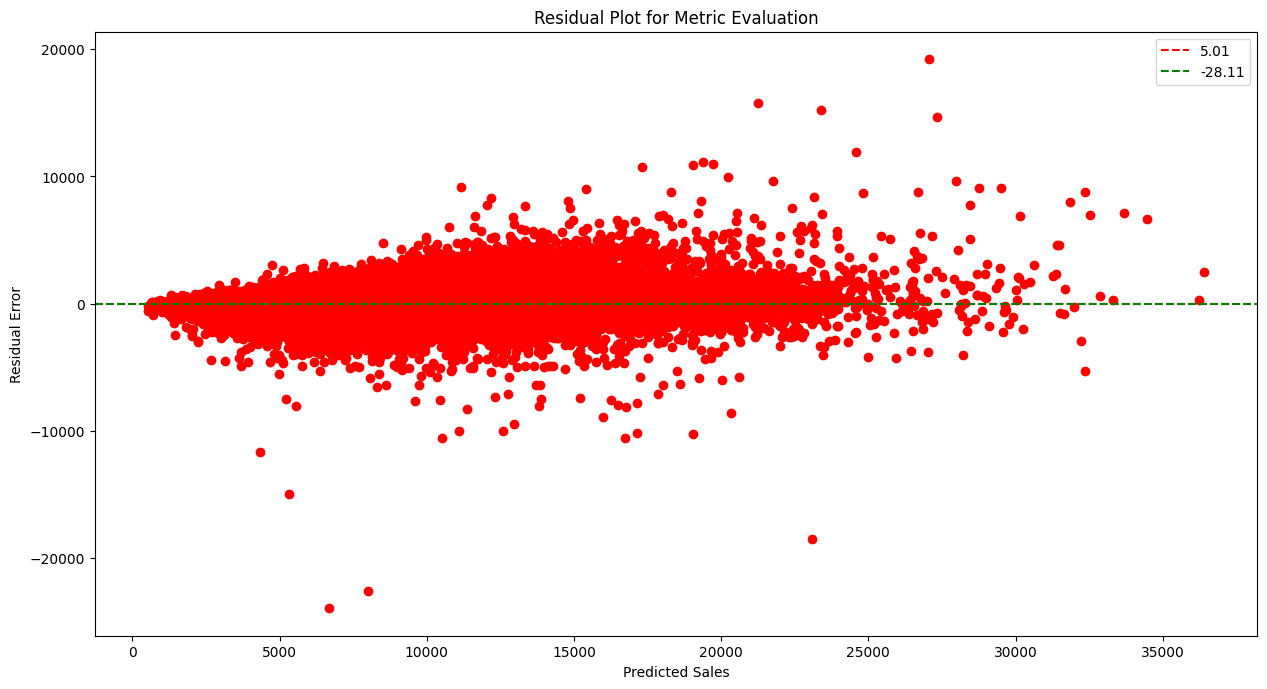

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="red")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

By Random Forest we have achieved the r2 score of 0.95 on training and 0.93 on test dataset that is very good MSE also reduced from 19 to 17 and that means our model is moving towards optimal model. Apart from this our MAPE is also reducing gradually as we are using ensemble of Decision trees that is Bootstrap Aggregation(Bagging) so it is giving equal preference each of the feature while spliting.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since predicting sales over a period of time falls under the category of "Time series data" and there are following regression metrics that are required as per our goal of analysis (Predicting future Sales):

MAE(Mean Absolute Error): This metric calculates the average magnitude of the errors in the predictions, without considering their direction. It has the inverse relation with the accuracy of the model. In regression analysis our aim is to minimise the MAE and ultimately this will create positive business impact.

RMSE(Root Mean Squared Error): It is the square root of MSE and this is the most widely use regression metric since it has the same units as the original data so it is easy to interpret the magnitude of error.

R2_Score: R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

Accuracy: In time series data (Such as predicting Sales, Customers, Stock prices, etc) the best metric to calculate the accuracy is 100-MAPE, which is the average of the absolute percentage differences between the predicted values and the actual values. A lower value for 100-MAPE indicates a more accurate model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest"]
MAE_r = [5.49,2.99,2.46] 
MSE_r = [56.21,19.35,13.9]
RMSE_r = [7.49,4.39,3.68]
MAPE_r = [6.85,3.69,3.03]
r2_r = [0.75,0.91,0.93]
accuracy_r = [93.14,96.30,96.96]

# Create dataframe from the lists
data = {'Models': models, 
        'MAE': MAE_r,
        'MSE': MSE_r,
        'RMSE': RMSE_r,
        'MAPE': MAPE_r,
        'R2': r2_r,
        'Accuracy': accuracy_r
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models   MAE    MSE  RMSE  MAPE    R2  Accuracy
0  Linear_regression  5.49  56.21  7.49  6.85  0.75     93.14
1      Decision_tree  2.99  19.35  4.39  3.69  0.91     96.30
2      Random_forest  2.46  13.90  3.68  3.03  0.93     96.96

We have chosen Random_forest as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13} as it is very clear from above dataframe that it has given the highest accuracy (96.96%), least MAPE (3.03%) and maximum r2 score(0.93) on the testing dataset among all other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest uses  to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. random forest also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

**Feature importance as per Random Forest**

Text(0.5, 0, 'Relative Importance')

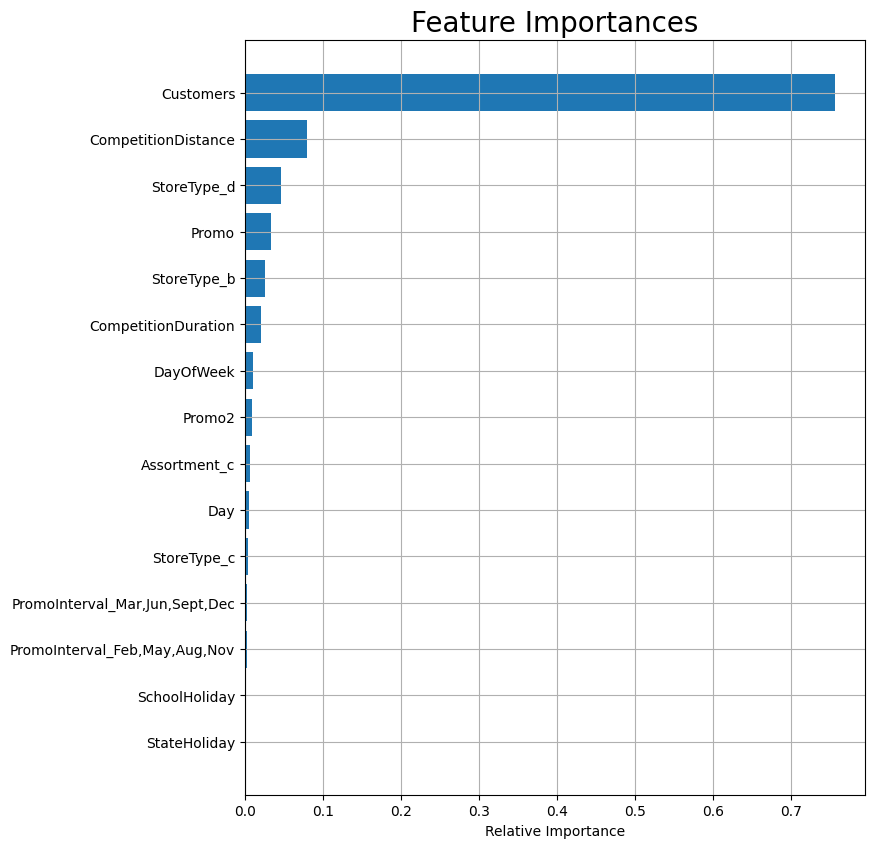

In [ ]:
# Plotting the barplot to determine which feature is contributing the most
features = final_df.columns
importances = RF_TreeR.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

**Final Sales Prediction**

In [ ]:
#constructing a prediction dataframe with the actual and predicted sales values.
prediction_df = pd.DataFrame(np.array((y_test)**2), columns = ["y_test"])
prediction_df["y_test_RFtree_pred"] = np.array((y_test_RFtree_pred)**2)
prediction_df.head(20)

y_test  y_test_RFtree_pred
0   74407876        7.983639e+07
1   27154521        2.839071e+07
2   88510464        6.540138e+07
3   27394756        2.149937e+07
4   68890000        7.117118e+07
5   59613841        4.838678e+07
6   16475481        1.888317e+07
7   41460721        3.743962e+07
8   15689521        1.476526e+07
9   96530625        1.166869e+08
10  22033636        2.198974e+07
11  89113600        8.891210e+07
12  30591961        3.133741e+07
13  46812964        3.533004e+07
14  88040689        8.993524e+07
15  36747844        4.112237e+07
16  11329956        9.596762e+06
17  66292164        6.851574e+07
18  20502784        2.548812e+07
19  26061025        2.391142e+07

# **Conclusion**

**Conclusions drawn from EDA**

 EDA help us to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers.After performing EDA we have drawn the following conclusions:

1.  Sales vs Customers graph shows positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase.
2.    As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.
3.  Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.
4.  As stores are getting promoted, more sales are getting generated.
5.  Promo interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season. However, the other intervals are recording sales that are close to the 1st interval.



**Conclusions from ML Model Implementation**

We have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions;
1. In Linear Regression we got the accuracy of ~93% and the model is capturing 75% of variance even after using regularization techniques that means our data is not perfectly linearly dependent with target variable(Sales).
2. For Decsion Tree we have achieved ~96.3% accuracy with maximum depth of 18 and on increasing the depth over it we are falling towards overfitting and MAPE of 3.6% which ultimately increases the mean absolute percentage error.
3. Giving preference to each of the variable always results in better accuracy as small subsets can provide significant accuracy percentage. Ensemble technique i.e Random Forest has given the accuray of ~96.96% with total trees of 100 in the forest with hyperparameter tuning



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***